# **Project Name : ✨ Parkinson's Disease Detection ✨**

AUTHOR : **Jamshed Butt** from **Data Science**



# **Understanding the dataset**

**Data Set Information:**

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

<br></br>
**Attribute Information :**

Matrix column entries (attributes):

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA** - Several measures of variation in amplitude

**NHR , HNR** - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE , D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

# **Import Libraries**

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#Normalize Data
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn import metrics

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Parkinson’s Disease Dataset/parkinsons.data")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [ ]:
df.drop(columns=["name"],inplace=True)

# **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

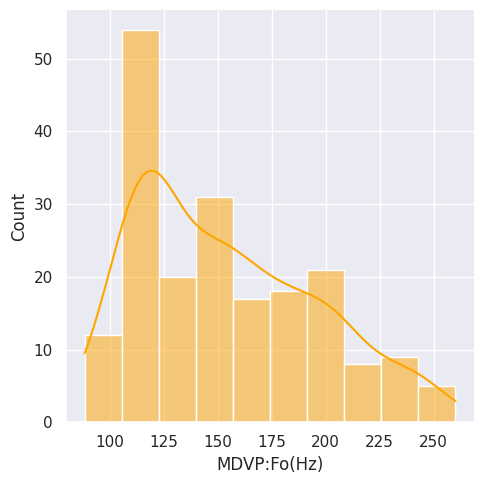

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Fo(Hz)"], kde=True , color="orange", bins=10)

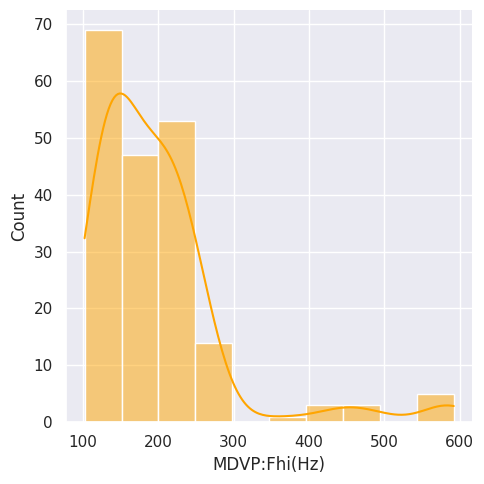

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Fhi(Hz)"], kde=True, color="orange", bins=10)

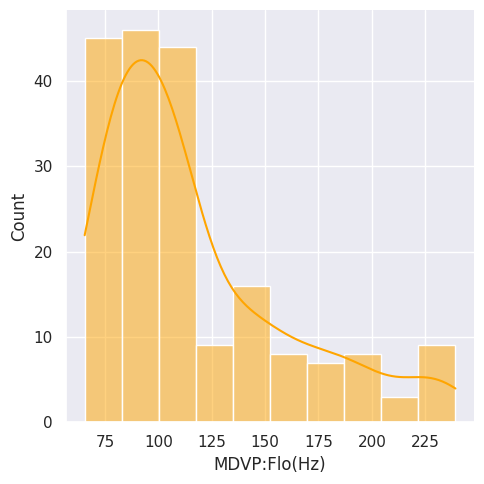

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Flo(Hz)"], kde=True, color="orange", bins=10)

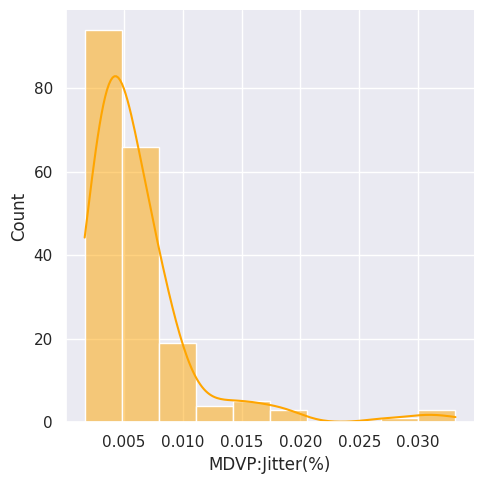

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Jitter(%)"], kde=True, color="orange", bins=10)

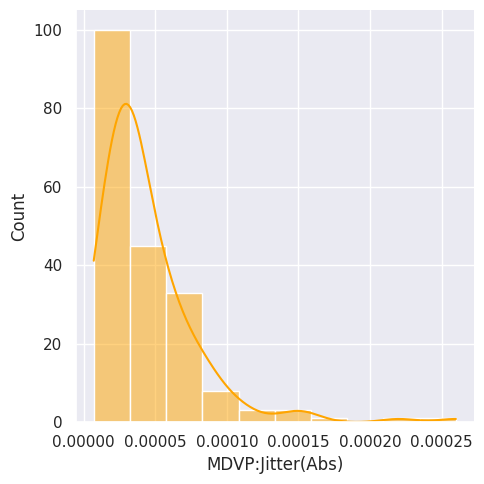

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Jitter(Abs)"], kde=True, color="orange", bins=10)

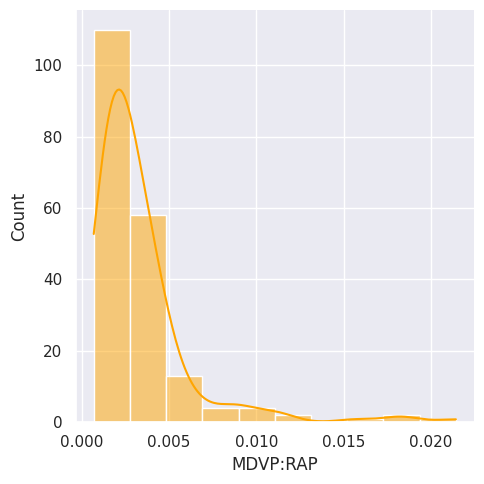

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:RAP"], kde=True, color="orange", bins=10)

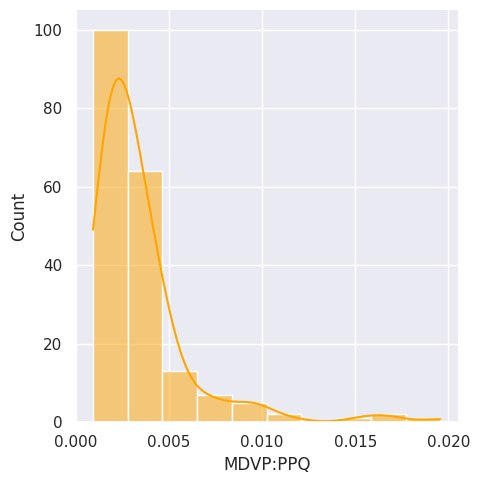

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:PPQ"], kde=True, color="orange", bins=10)

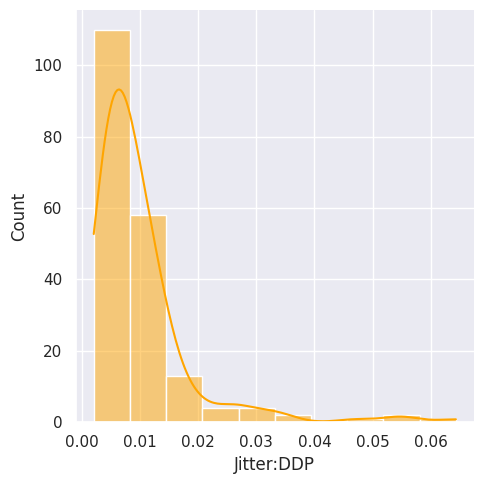

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Jitter:DDP"], kde=True, color="orange", bins=10)

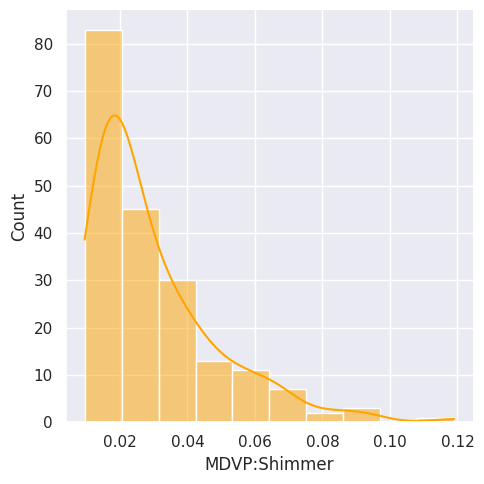

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Shimmer"], kde=True, color="orange", bins=10)

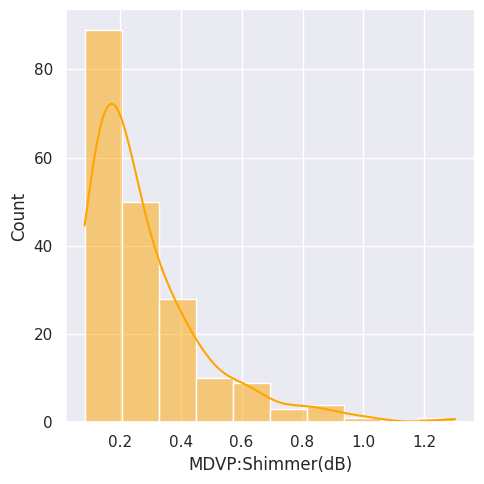

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:Shimmer(dB)"], kde=True, color="orange", bins=10)

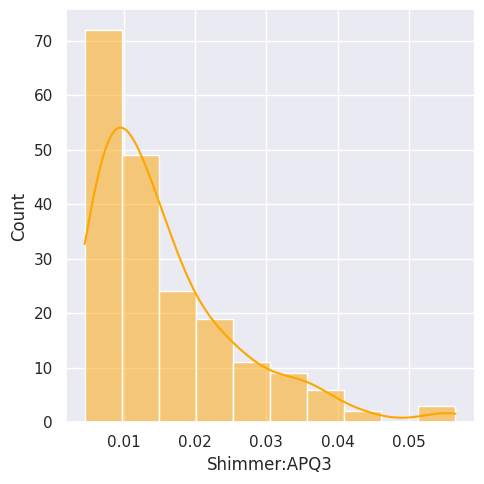

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Shimmer:APQ3"], kde=True, color="orange", bins=10)

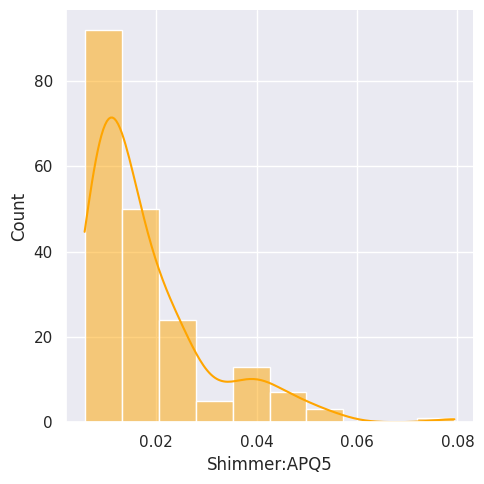

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Shimmer:APQ5"], kde=True, color="orange", bins=10)

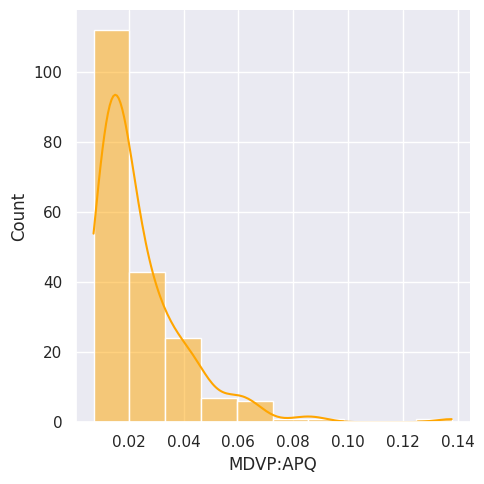

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["MDVP:APQ"], kde=True, color="orange", bins=10)

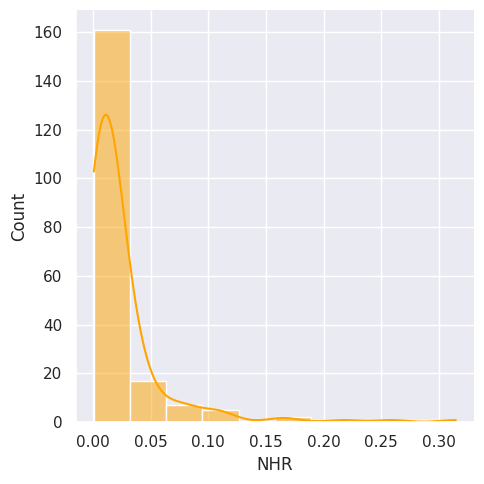

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["NHR"], kde=True, color="orange", bins=10)

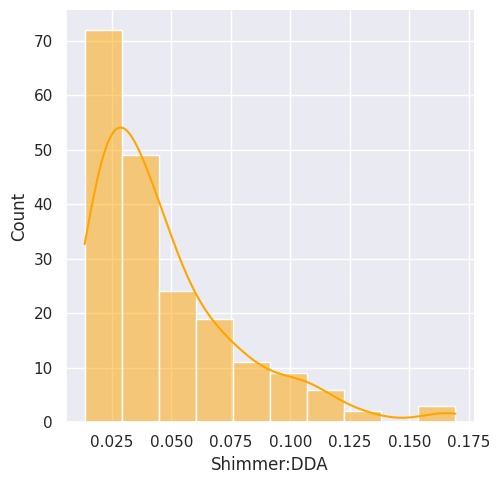

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["Shimmer:DDA"], kde=True, color="orange", bins=10)

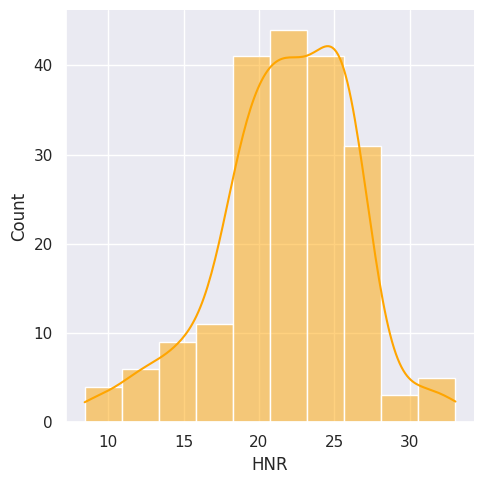

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["HNR"], kde=True, color="orange", bins=10)

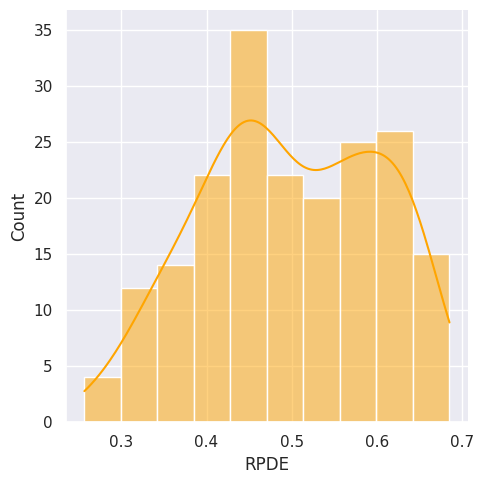

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["RPDE"], kde=True, color="orange", bins=10)

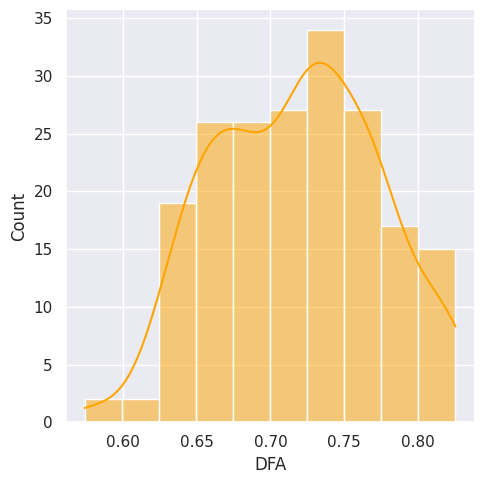

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["DFA"], kde=True, color="orange", bins=10)

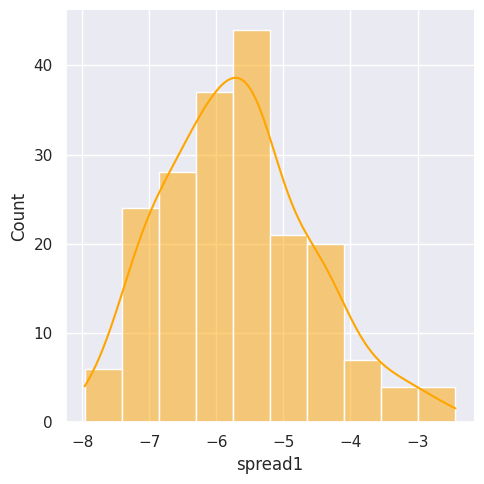

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["spread1"], kde=True, color="orange", bins=10)

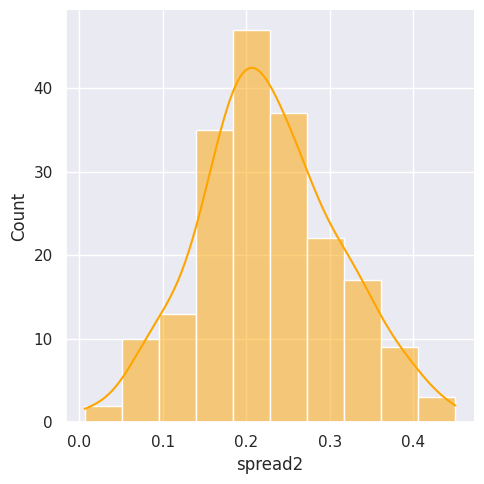

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["spread2"], kde=True, color="orange", bins=10)

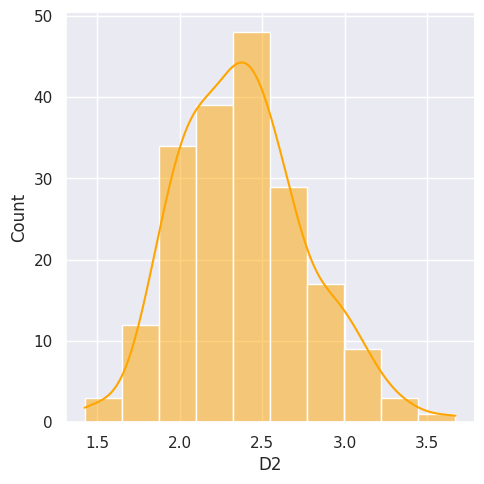

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["D2"], kde=True, color="orange", bins=10)

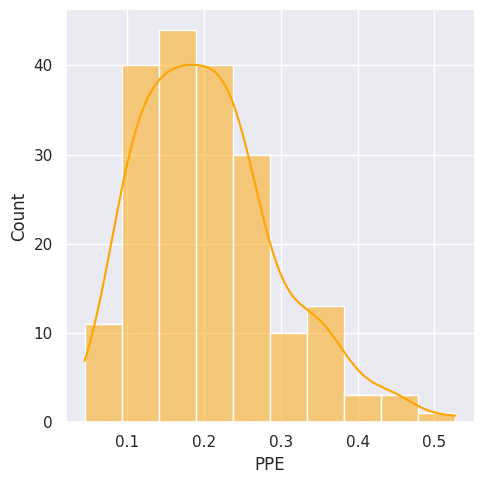

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["PPE"], kde=True, color="orange", bins=10)

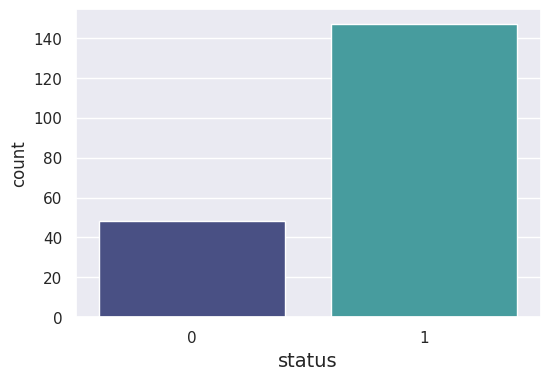

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='status' , data=df ,palette='mako')
plt.xlabel('status', fontsize=14)
plt.show()

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Check and Remove Nan Values**

In [ ]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### **Remove Outliers**

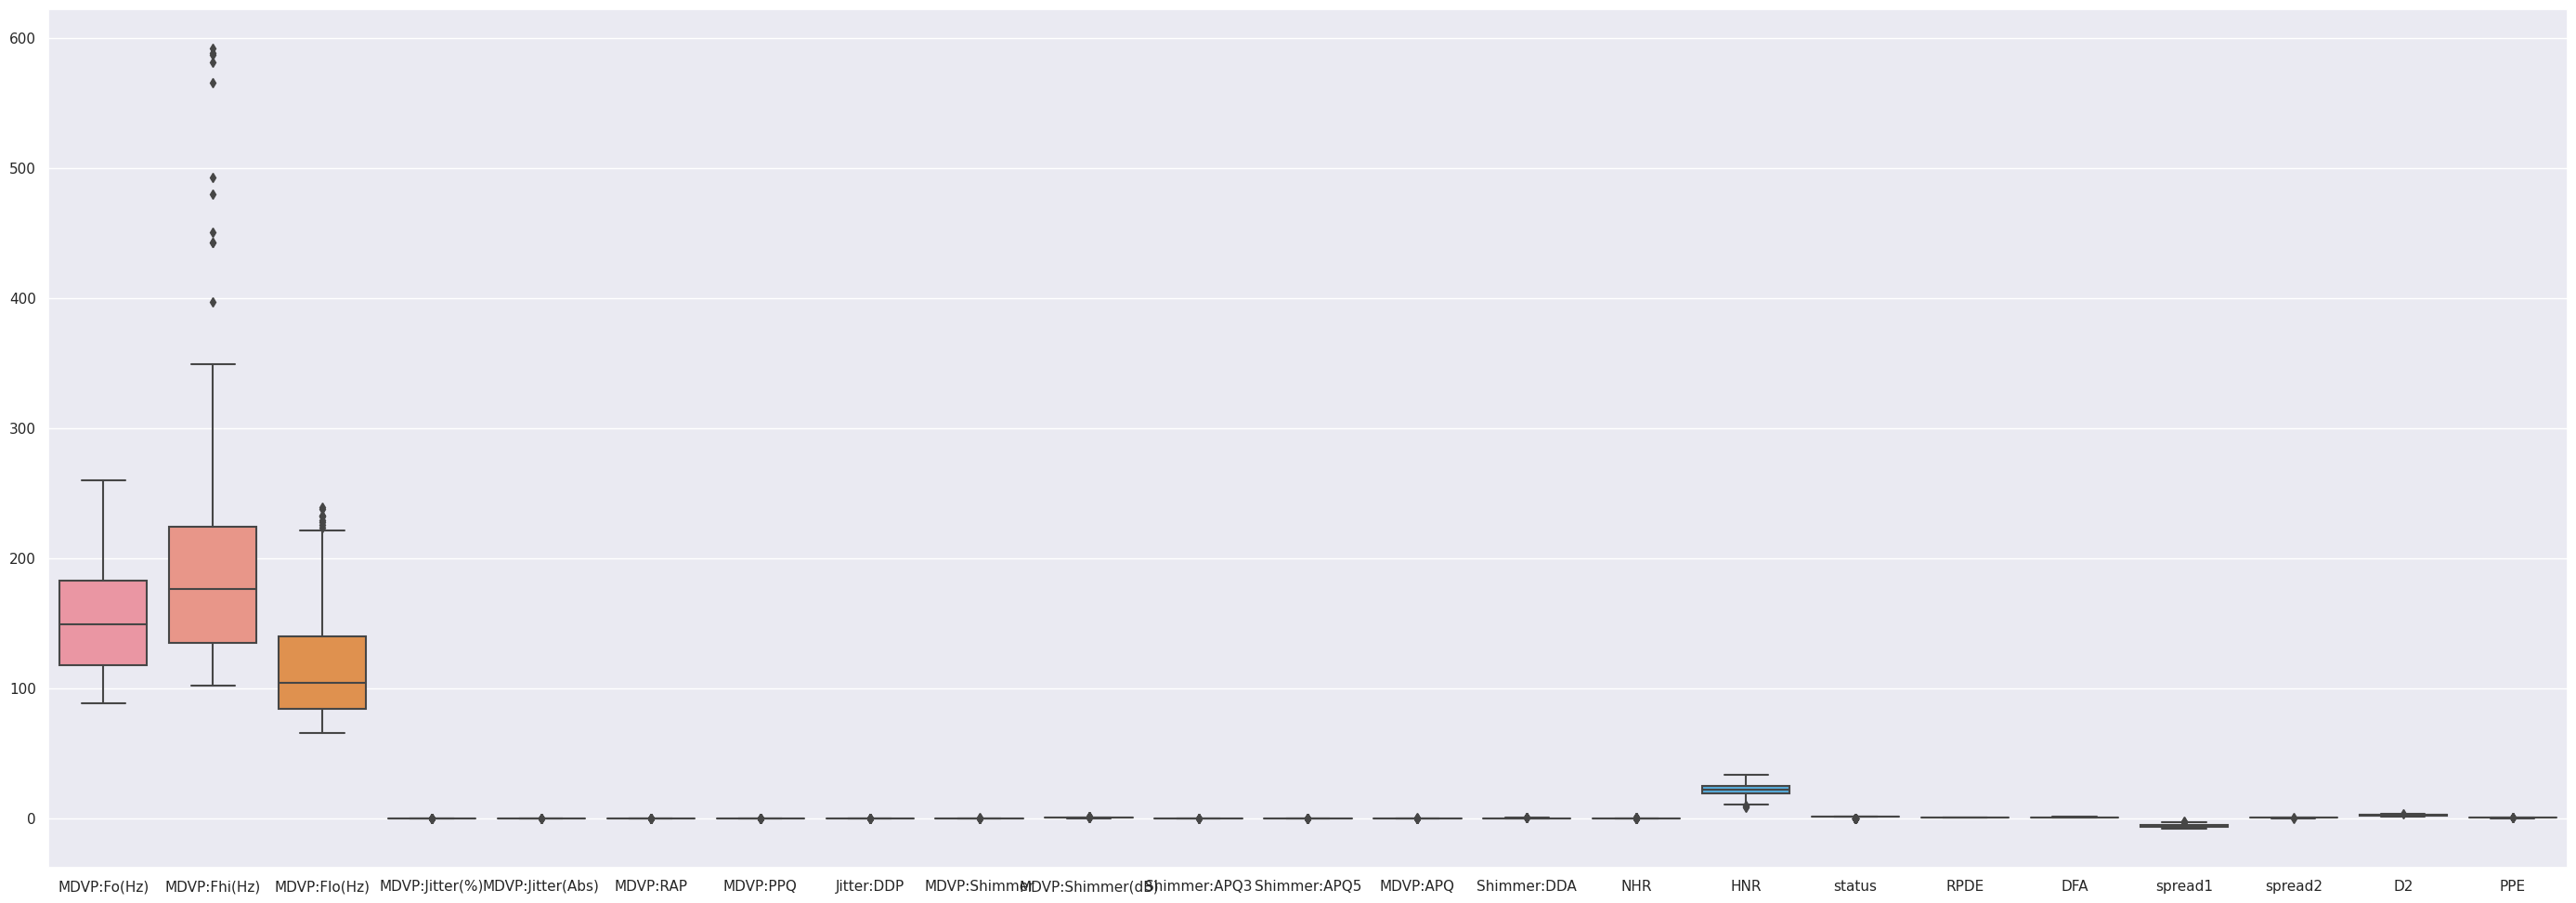

In [ ]:
plt.figure(figsize=(35,12))
sns.boxplot(df)
plt.show()

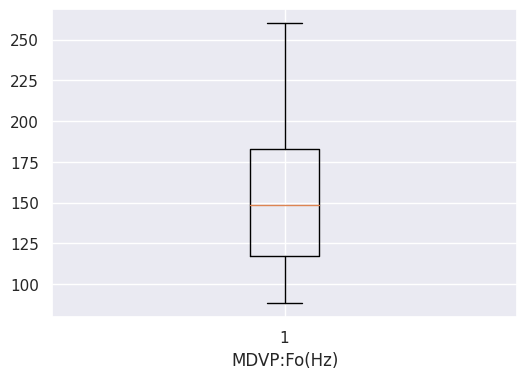

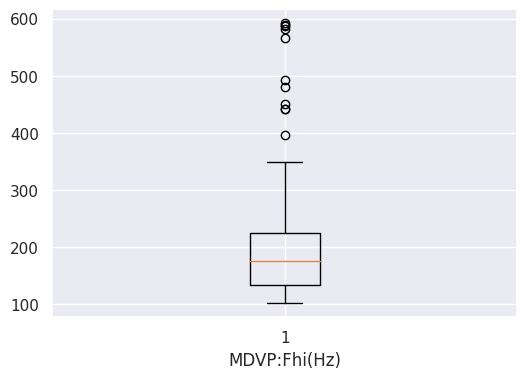

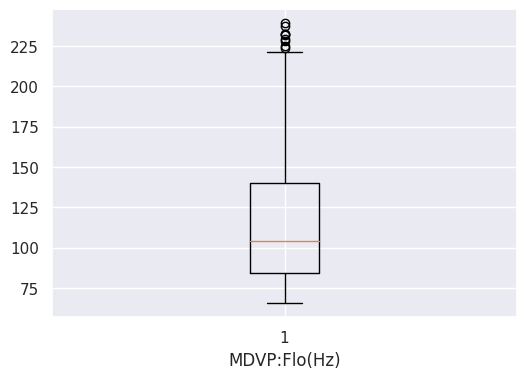

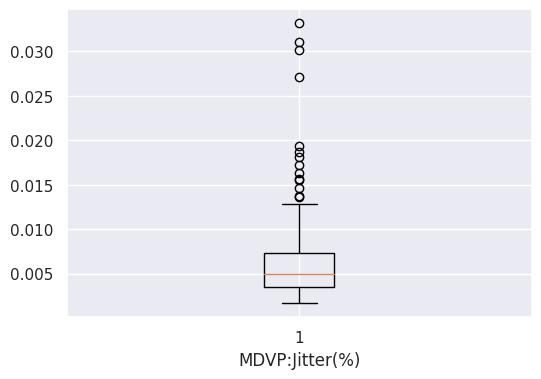

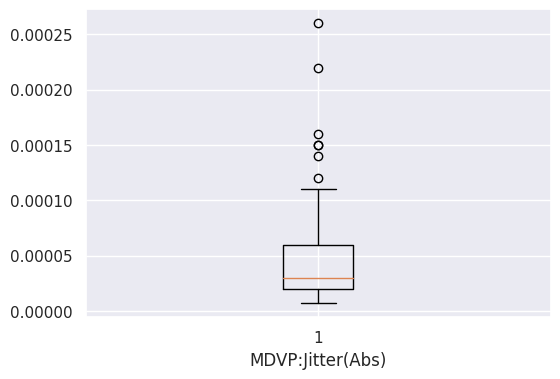

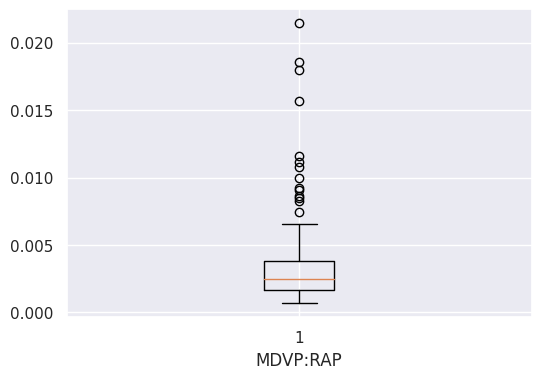

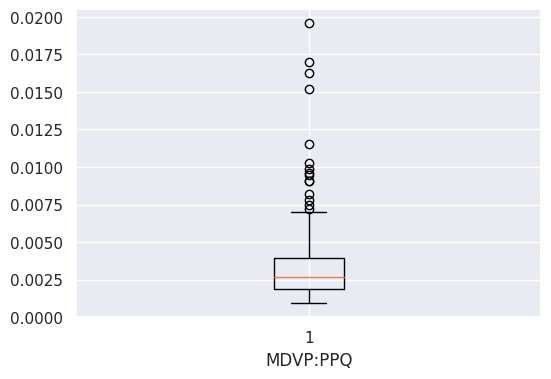

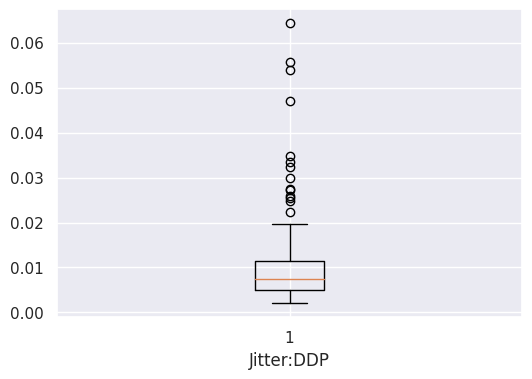

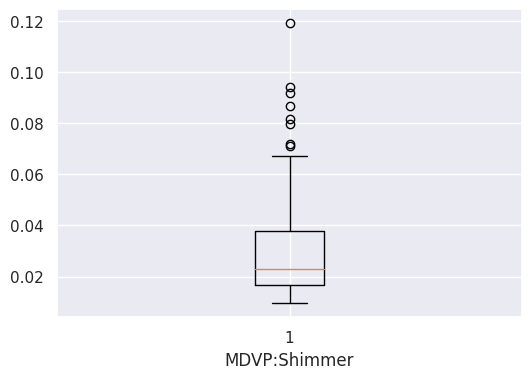

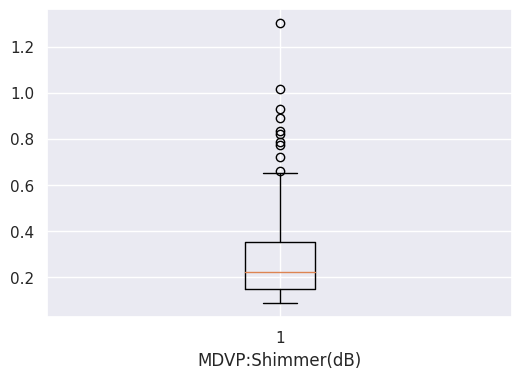

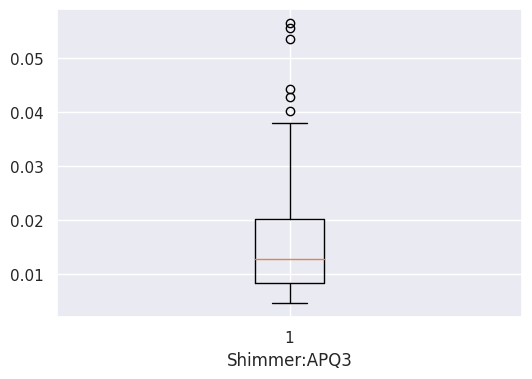

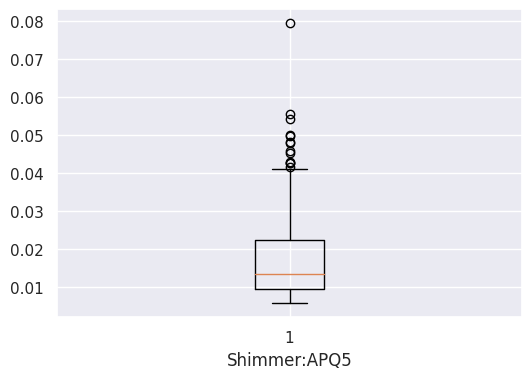

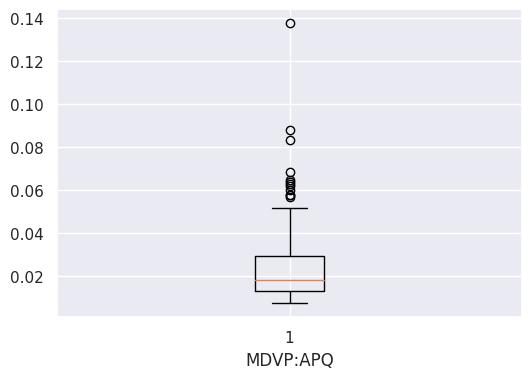

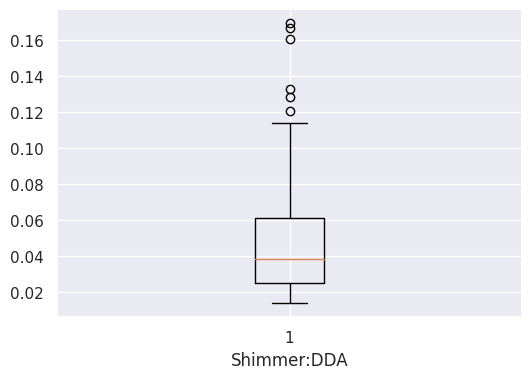

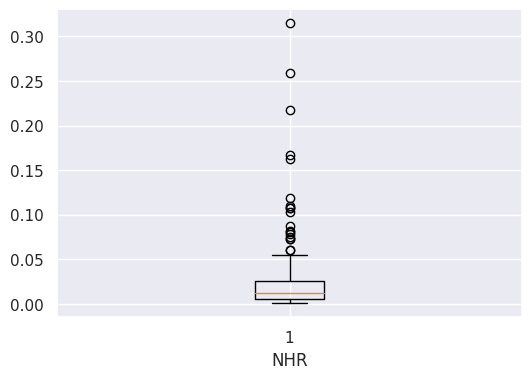

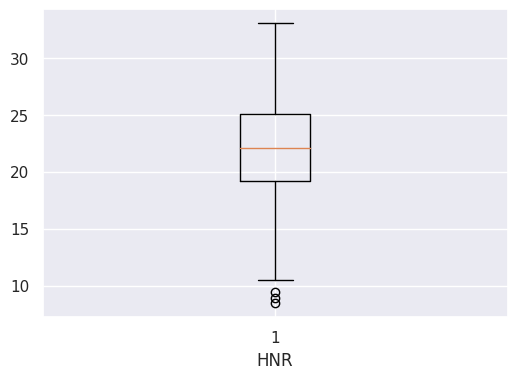

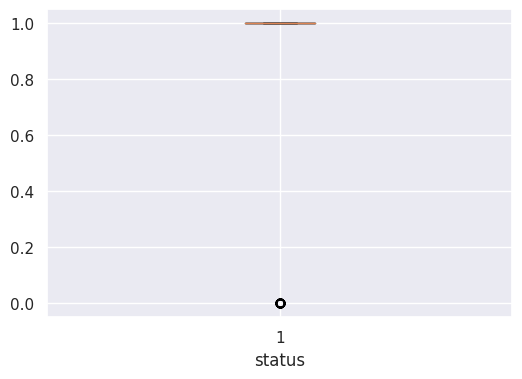

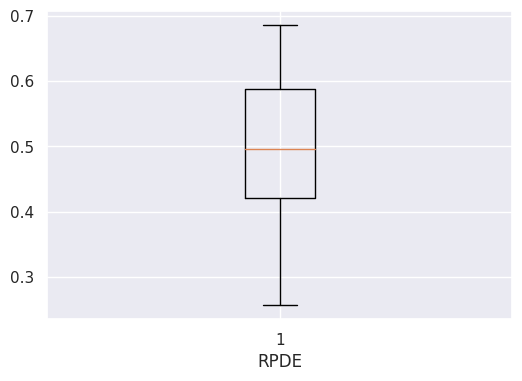

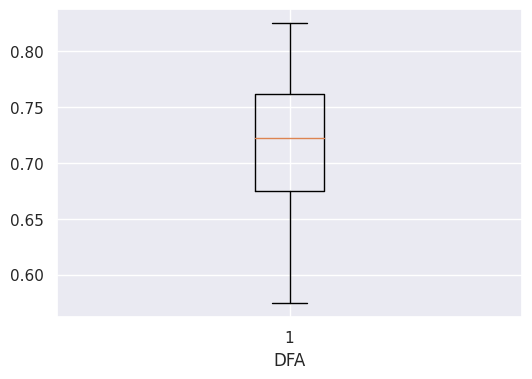

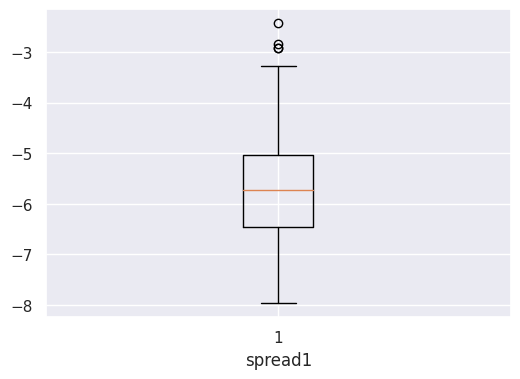

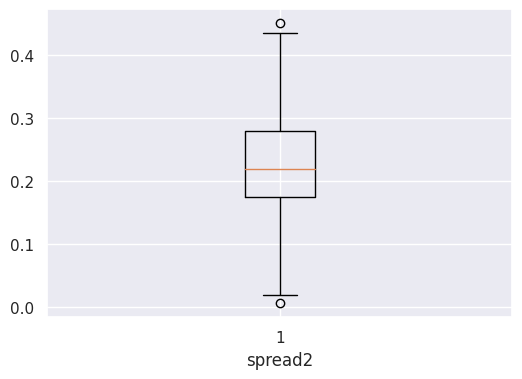

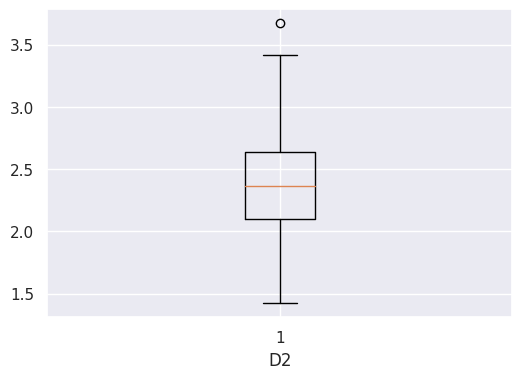

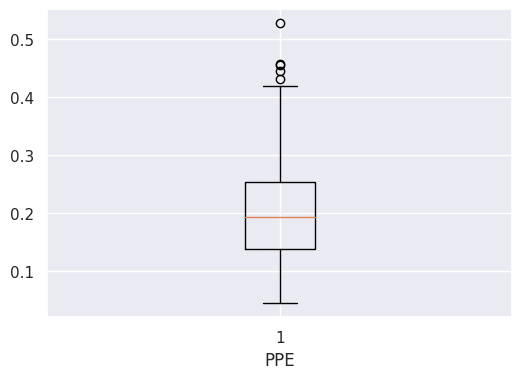

In [ ]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
df.columns.get_loc('status')

16

In [ ]:
for i in df.columns:
  if df.columns.get_loc(i) == 16:
    pass
  else:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

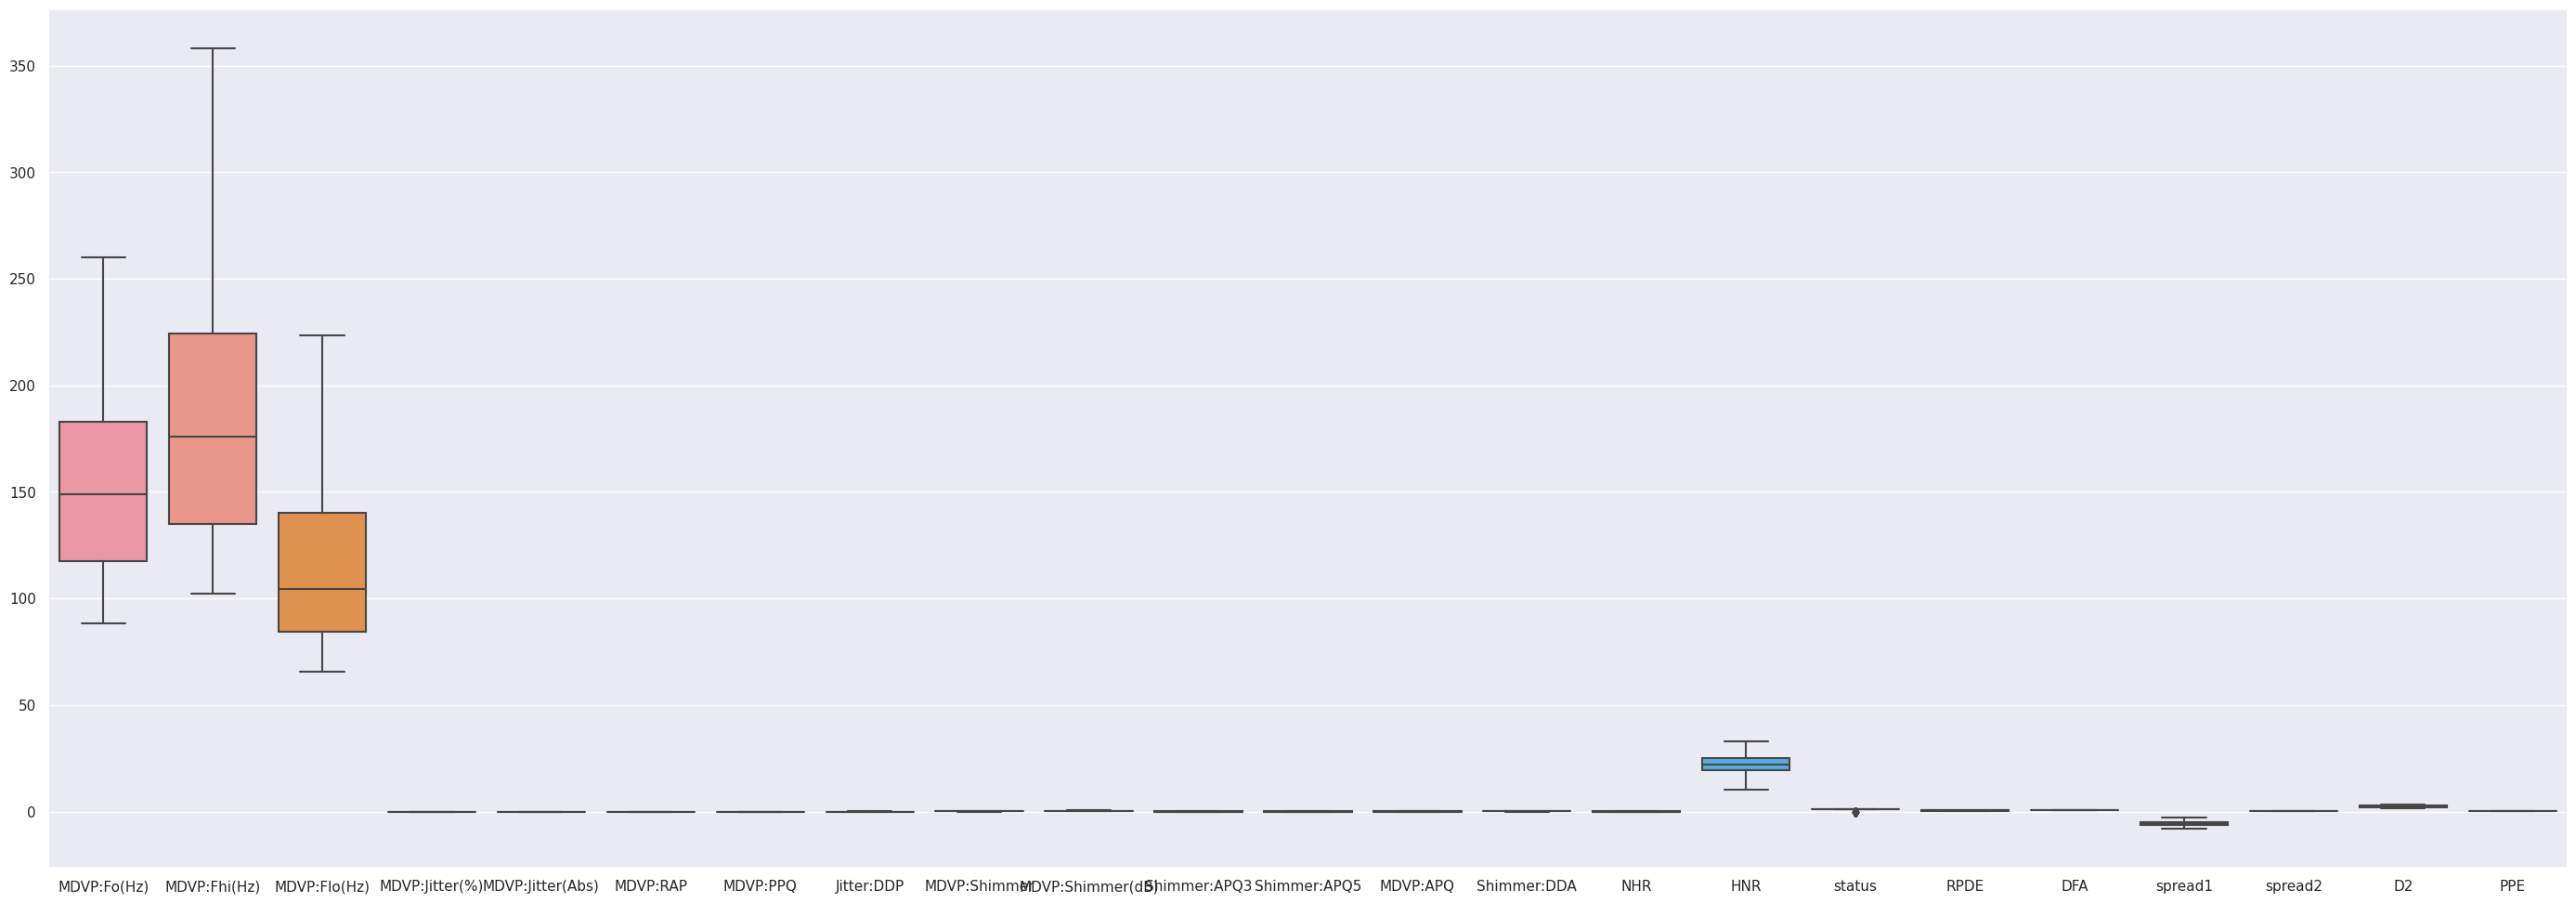

In [ ]:
plt.figure(figsize=(35,12))
sns.boxplot(df)
plt.show()

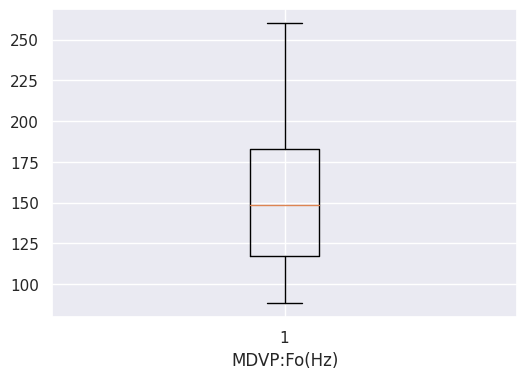

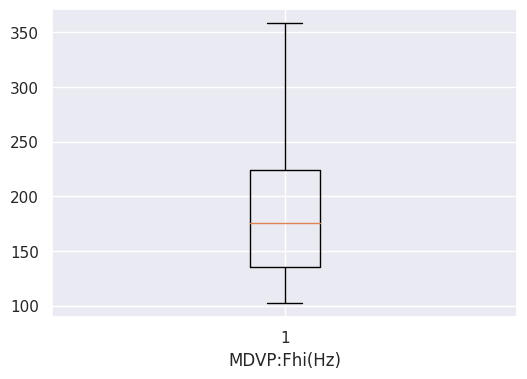

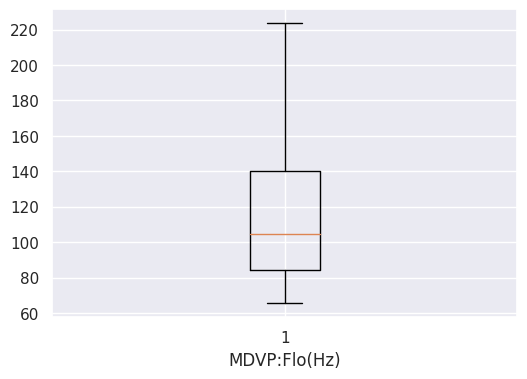

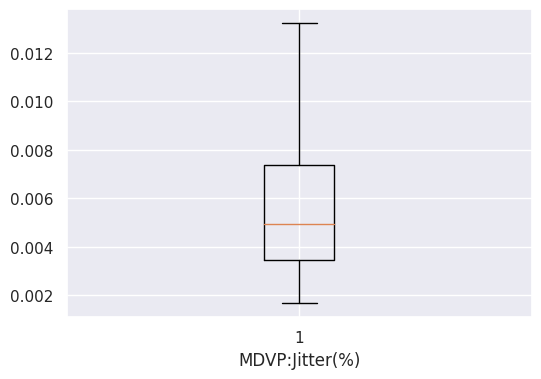

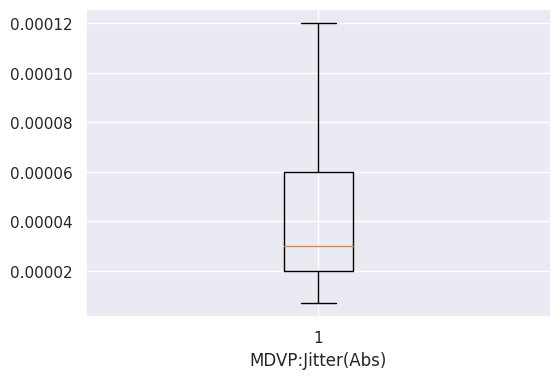

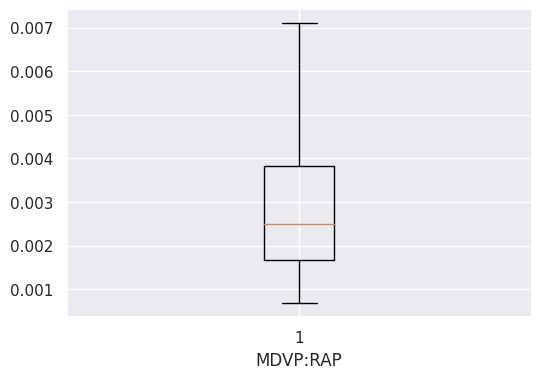

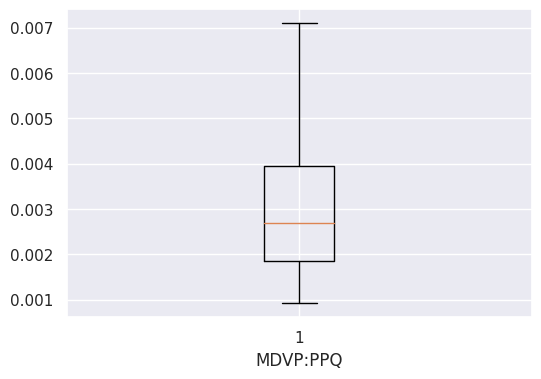

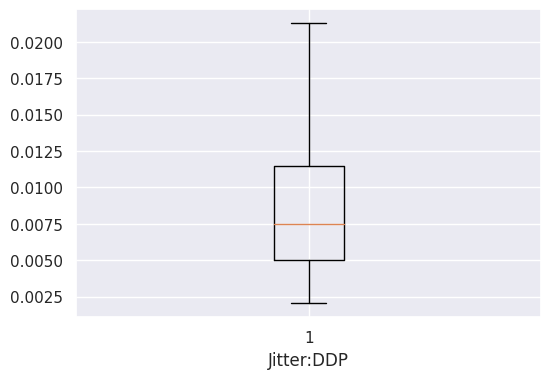

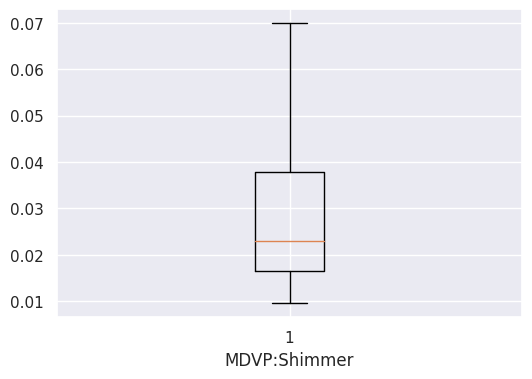

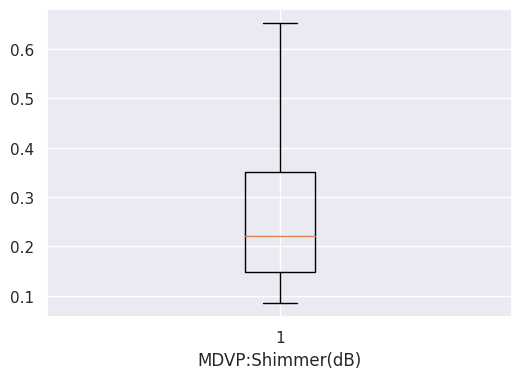

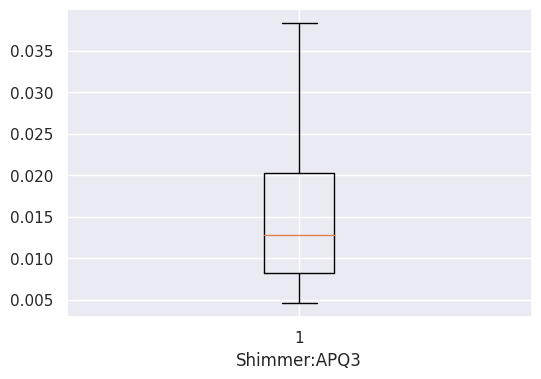

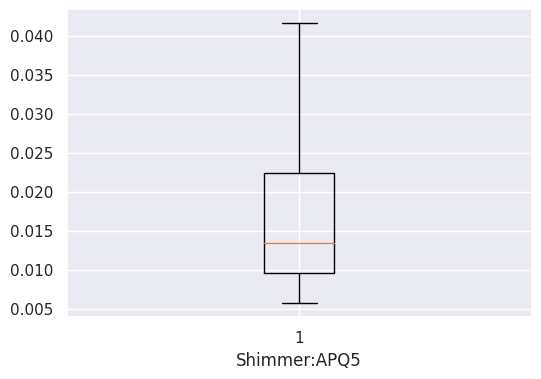

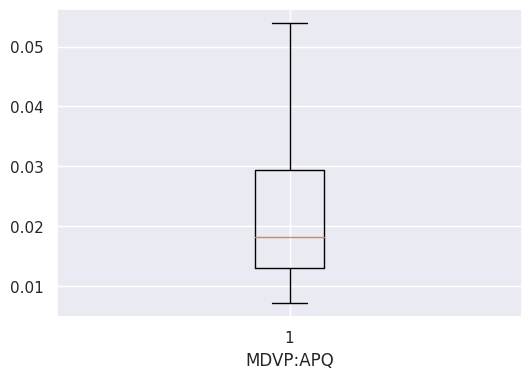

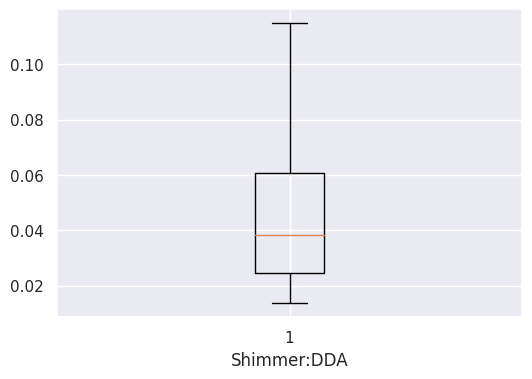

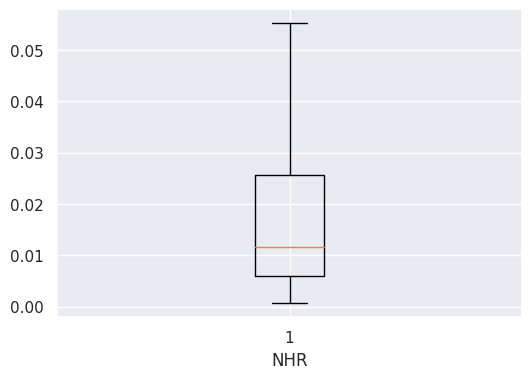

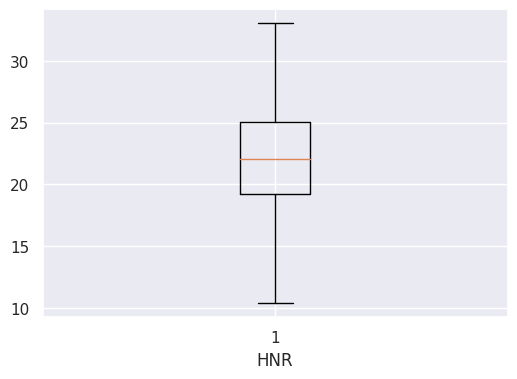

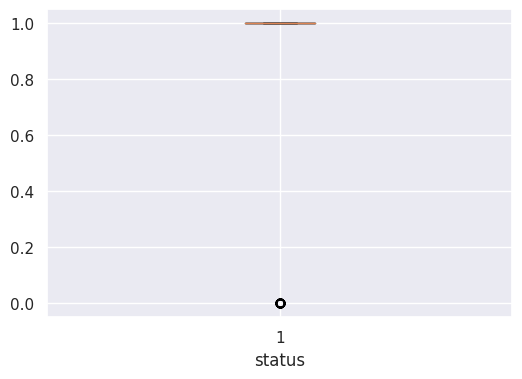

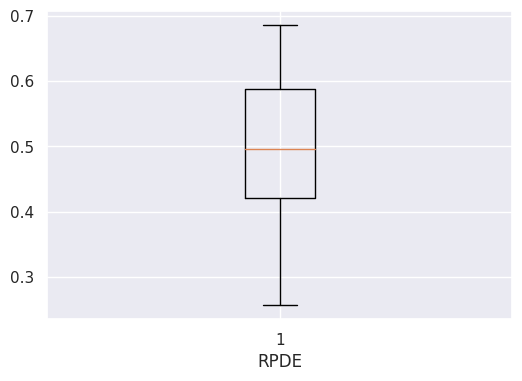

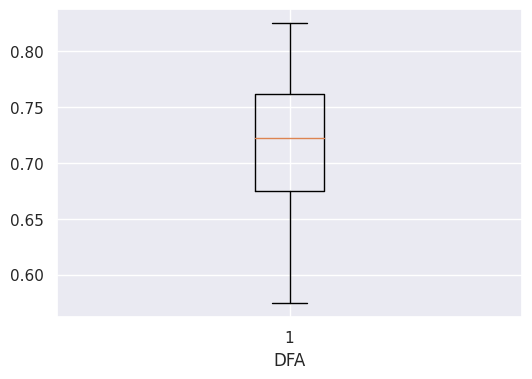

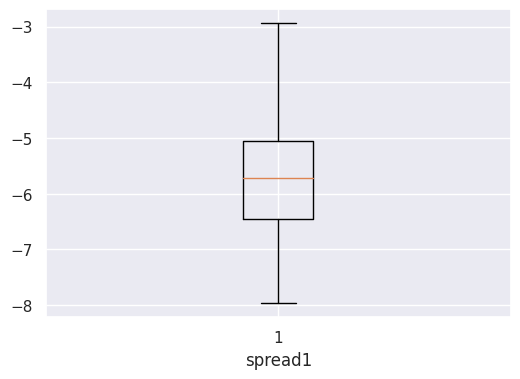

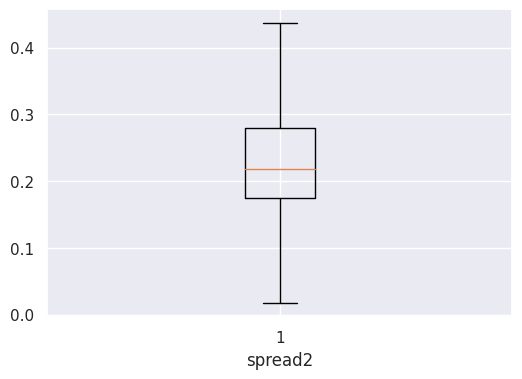

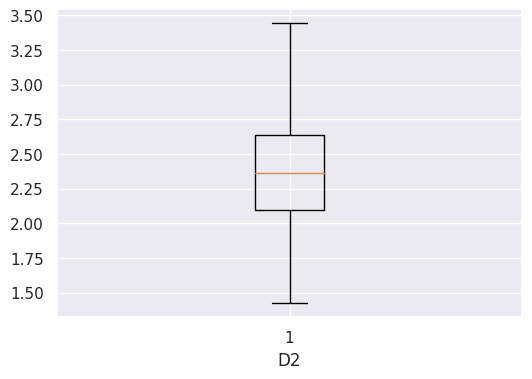

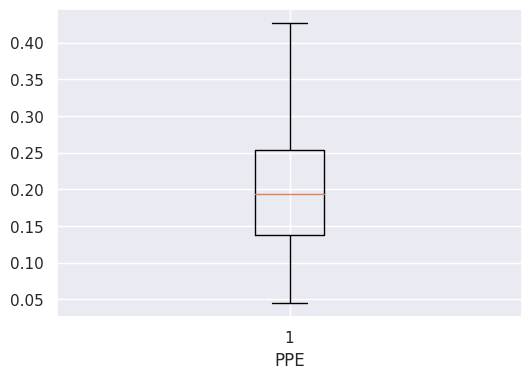

In [ ]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

#### **Bivariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

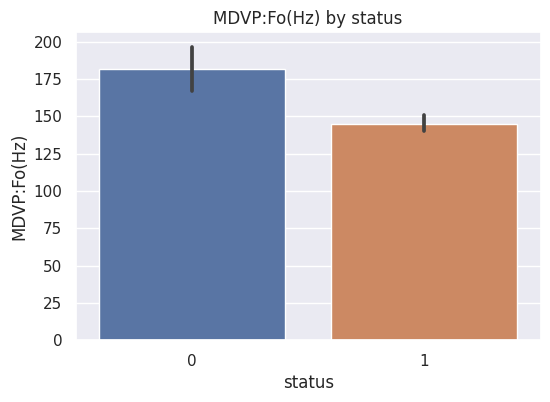

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Fo(Hz)', data=df)
plt.title('MDVP:Fo(Hz) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Fo(Hz)')
plt.show()

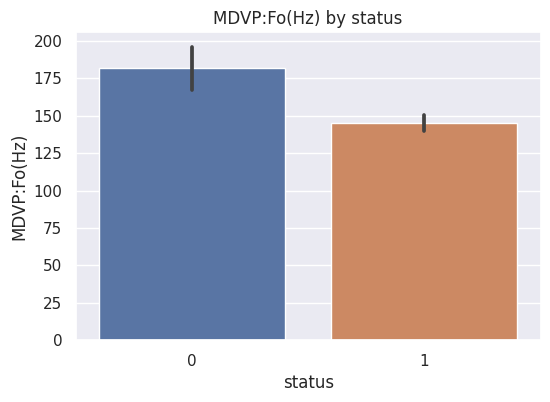

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Fo(Hz)', data=df)
plt.title('MDVP:Fo(Hz) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Fo(Hz)')
plt.show()

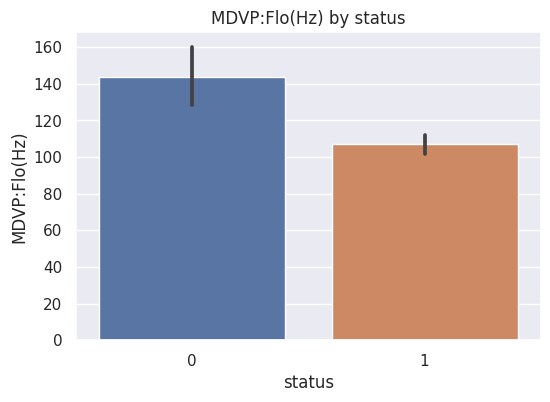

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Flo(Hz)', data=df)
plt.title('MDVP:Flo(Hz) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Flo(Hz)')
plt.show()

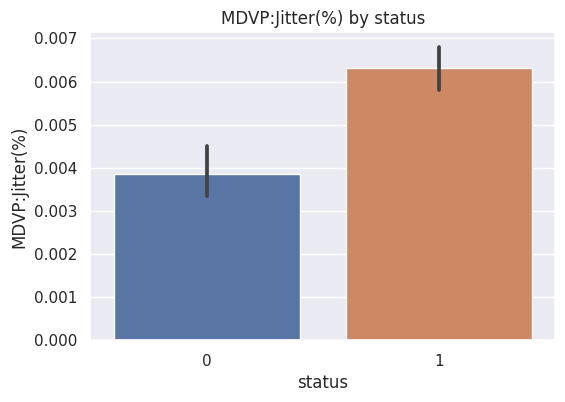

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Jitter(%)', data=df)
plt.title('MDVP:Jitter(%) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Jitter(%)')
plt.show()

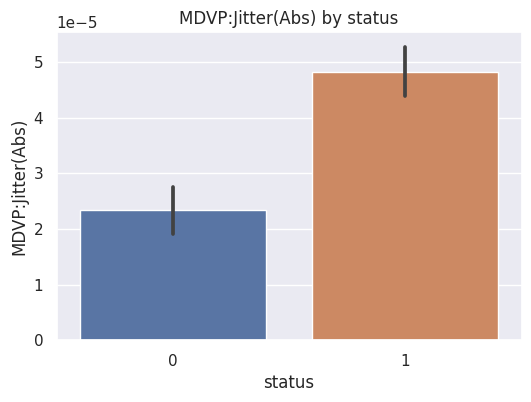

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Jitter(Abs)', data=df)
plt.title('MDVP:Jitter(Abs) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Jitter(Abs)')
plt.show()

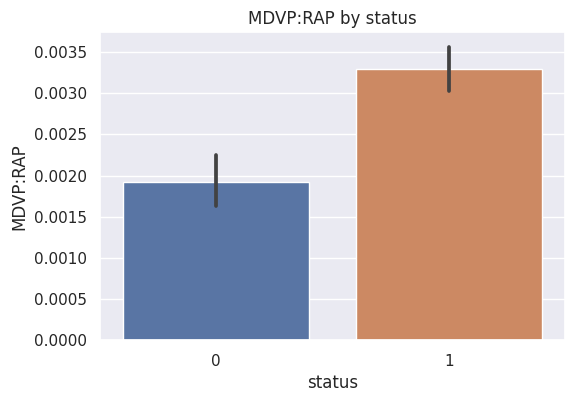

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:RAP', data=df)
plt.title('MDVP:RAP by status')
plt.xlabel('status')
plt.ylabel('MDVP:RAP')
plt.show()

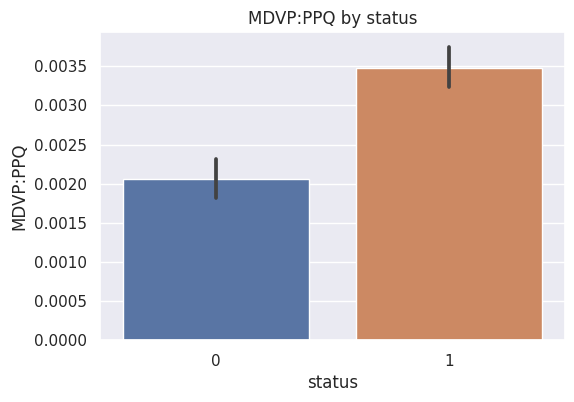

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:PPQ', data=df)
plt.title('MDVP:PPQ by status')
plt.xlabel('status')
plt.ylabel('MDVP:PPQ')
plt.show()

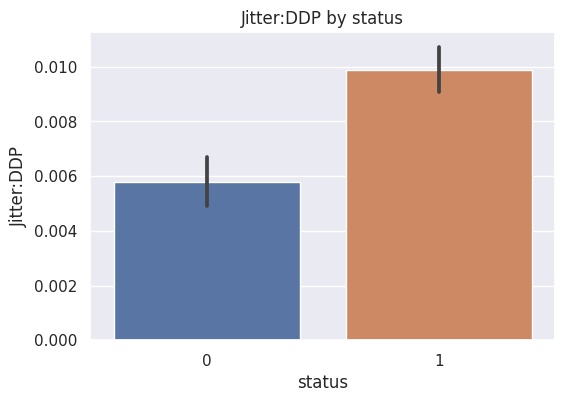

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='Jitter:DDP', data=df)
plt.title('Jitter:DDP by status')
plt.xlabel('status')
plt.ylabel('Jitter:DDP')
plt.show()

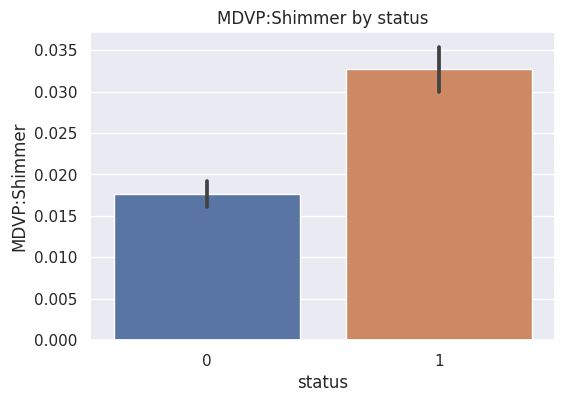

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Shimmer', data=df)
plt.title('MDVP:Shimmer by status')
plt.xlabel('status')
plt.ylabel('MDVP:Shimmer')
plt.show()

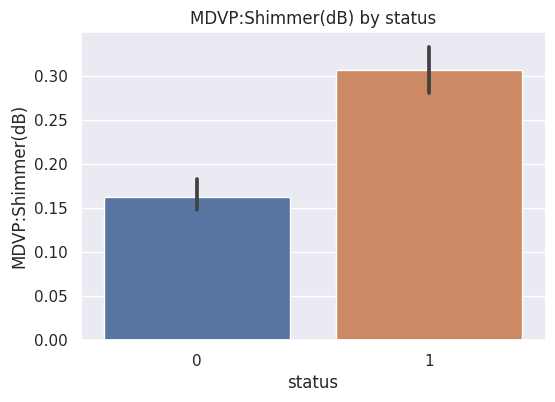

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:Shimmer(dB)', data=df)
plt.title('MDVP:Shimmer(dB) by status')
plt.xlabel('status')
plt.ylabel('MDVP:Shimmer(dB)')
plt.show()

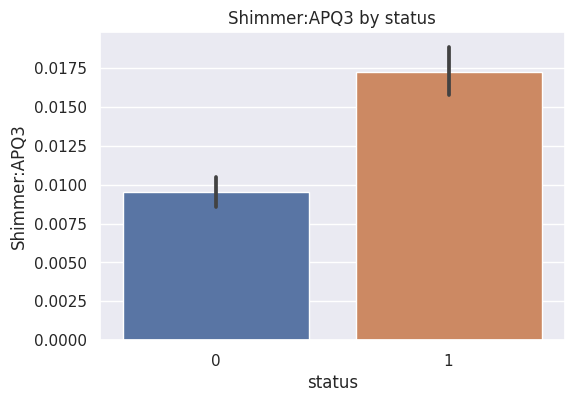

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='Shimmer:APQ3', data=df)
plt.title('Shimmer:APQ3 by status')
plt.xlabel('status')
plt.ylabel('Shimmer:APQ3')
plt.show()

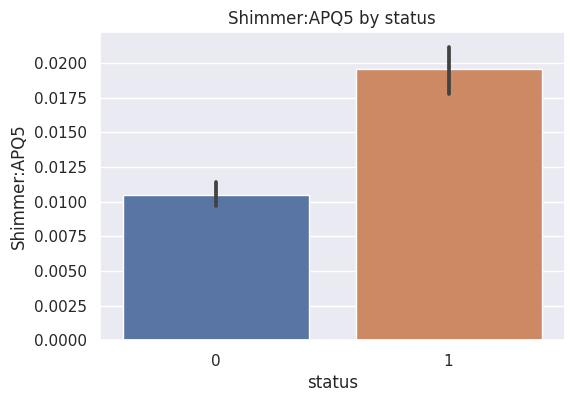

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='Shimmer:APQ5', data=df)
plt.title('Shimmer:APQ5 by status')
plt.xlabel('status')
plt.ylabel('Shimmer:APQ5')
plt.show()

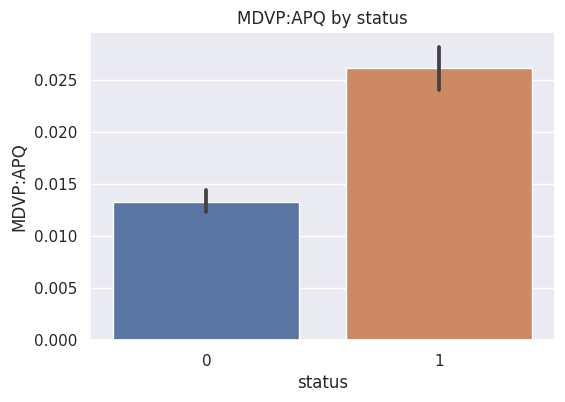

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='MDVP:APQ', data=df)
plt.title('MDVP:APQ by status')
plt.xlabel('status')
plt.ylabel('MDVP:APQ')
plt.show()

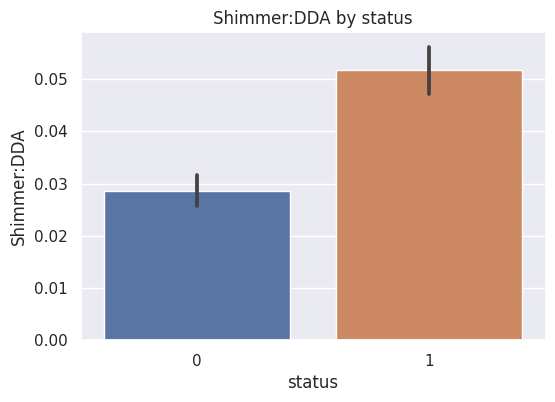

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='Shimmer:DDA', data=df)
plt.title('Shimmer:DDA by status')
plt.xlabel('status')
plt.ylabel('Shimmer:DDA')
plt.show()

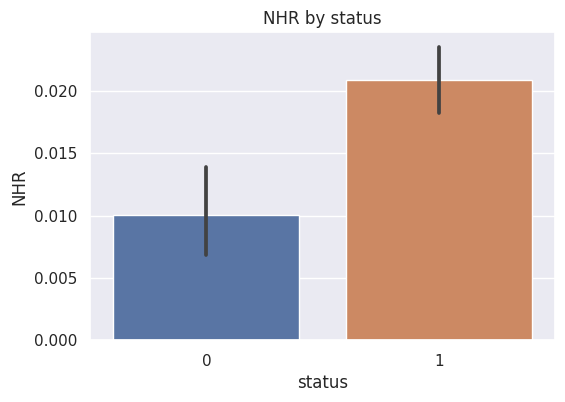

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='NHR', data=df)
plt.title('NHR by status')
plt.xlabel('status')
plt.ylabel('NHR')
plt.show()

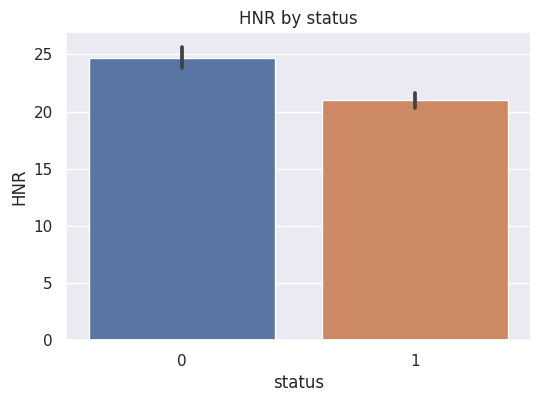

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='HNR', data=df)
plt.title('HNR by status')
plt.xlabel('status')
plt.ylabel('HNR')
plt.show()

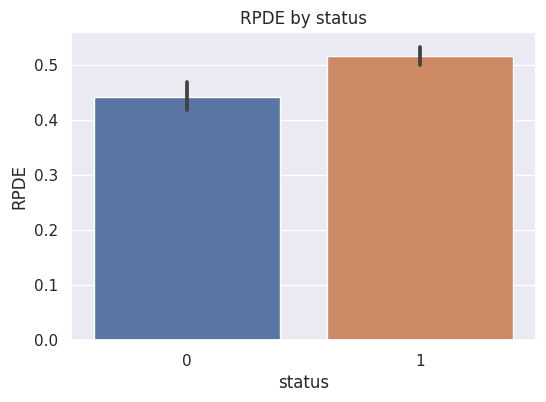

In [101]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='RPDE', data=df)
plt.title('RPDE by status')
plt.xlabel('status')
plt.ylabel('RPDE')
plt.show()

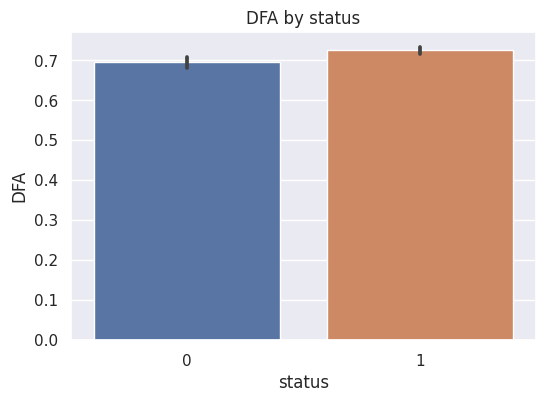

In [102]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='DFA', data=df)
plt.title('DFA by status')
plt.xlabel('status')
plt.ylabel('DFA')
plt.show()

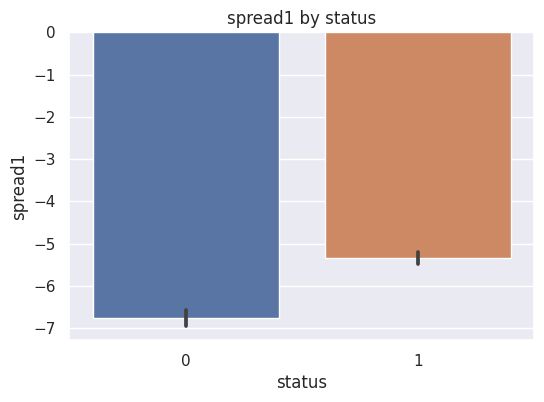

In [104]:
plt.figure(figsize=(6, 4))
sns.barplot(y='spread1' , x='status', data=df)
plt.title('spread1 by status')
plt.xlabel('status')
plt.ylabel('spread1')
plt.show()

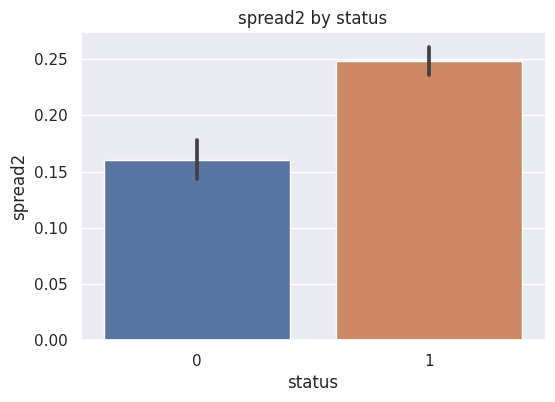

In [106]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='spread2', data=df)
plt.title('spread2 by status')
plt.xlabel('status')
plt.ylabel('spread2')
plt.show()

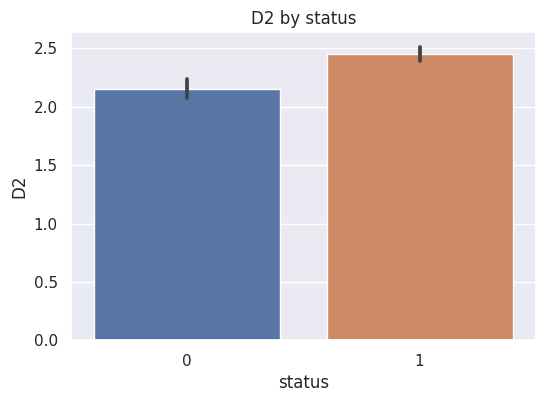

In [107]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='D2', data=df)
plt.title('D2 by status')
plt.xlabel('status')
plt.ylabel('D2')
plt.show()

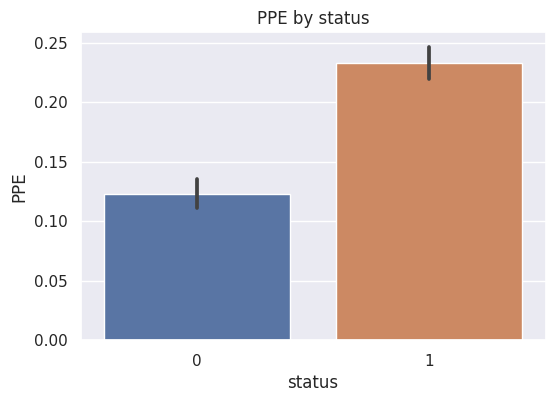

In [108]:
plt.figure(figsize=(6, 4))
sns.barplot(x='status', y='PPE', data=df)
plt.title('PPE by status')
plt.xlabel('status')
plt.ylabel('PPE')
plt.show()

<Axes: >

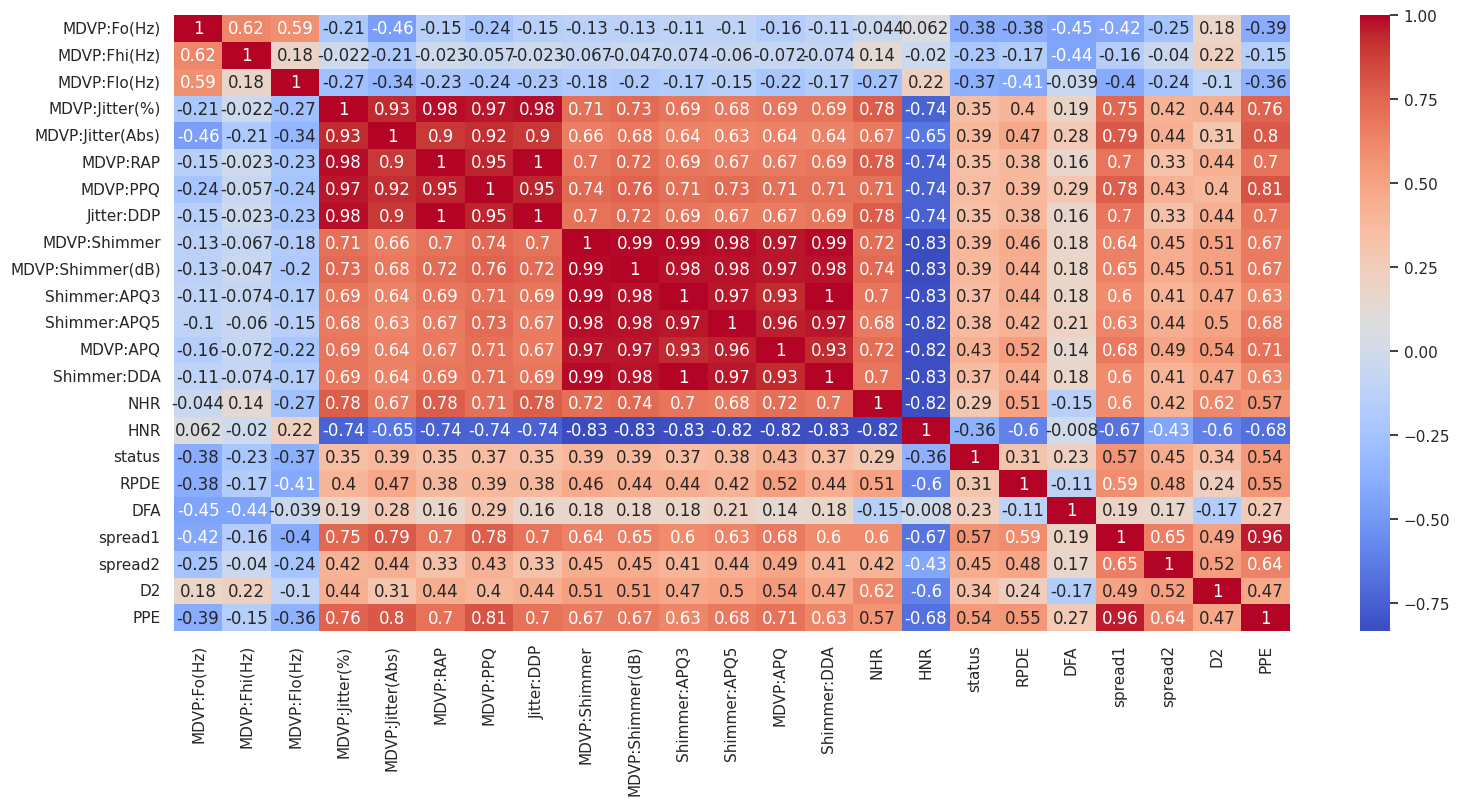

In [109]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


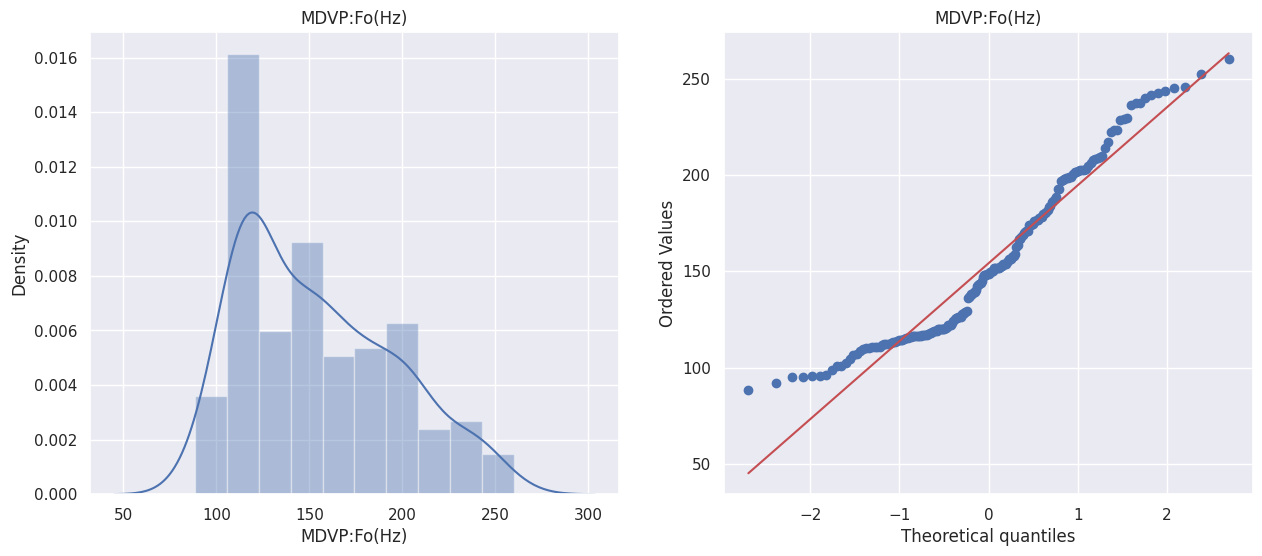

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


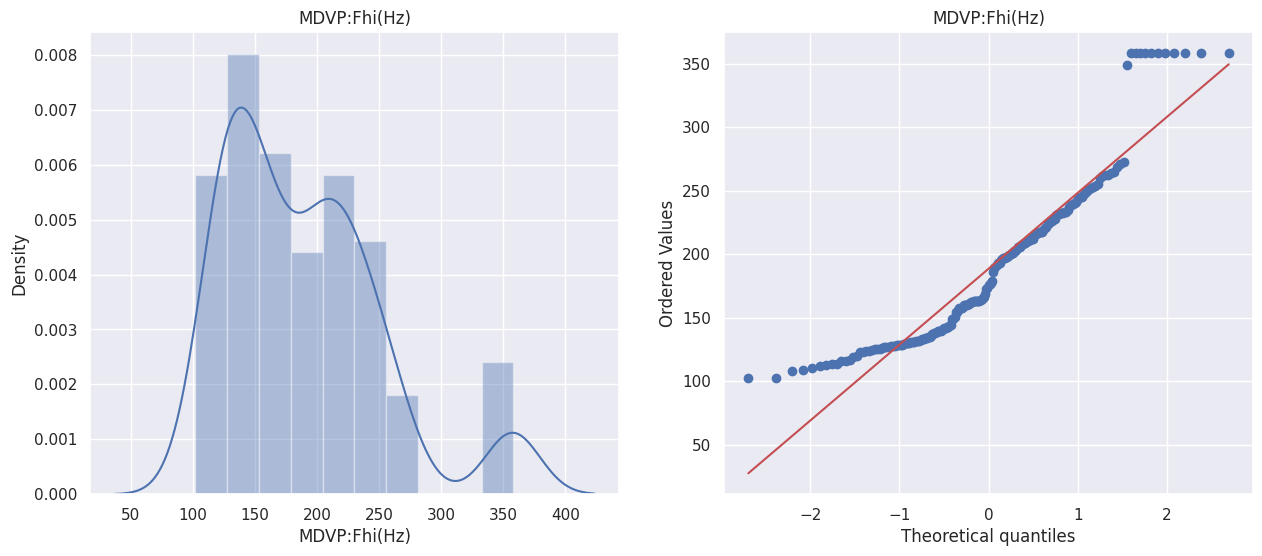

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


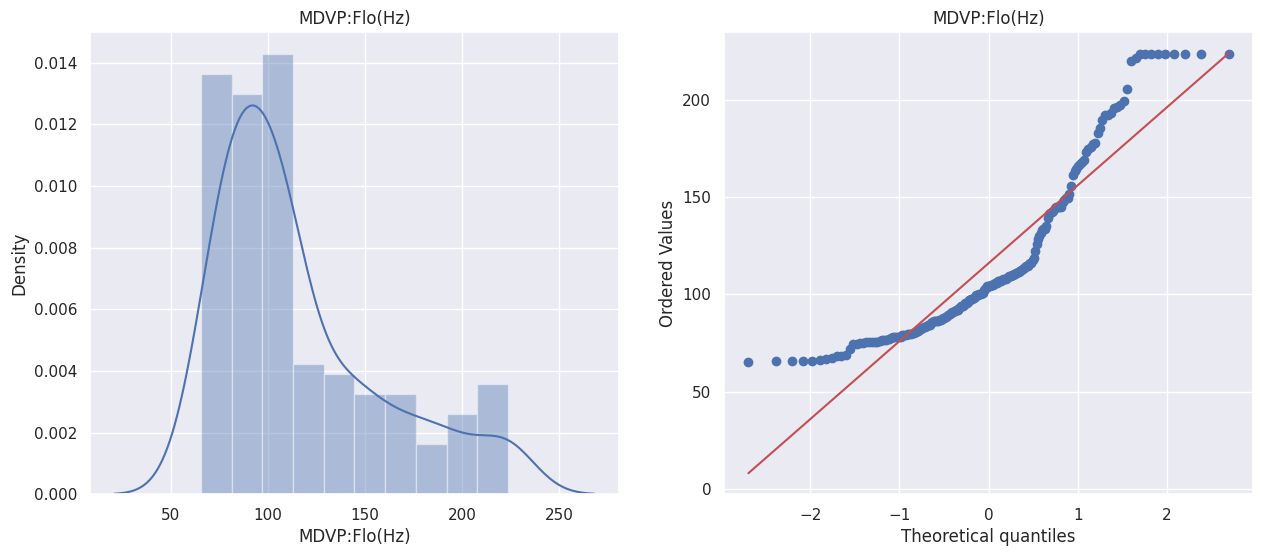

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


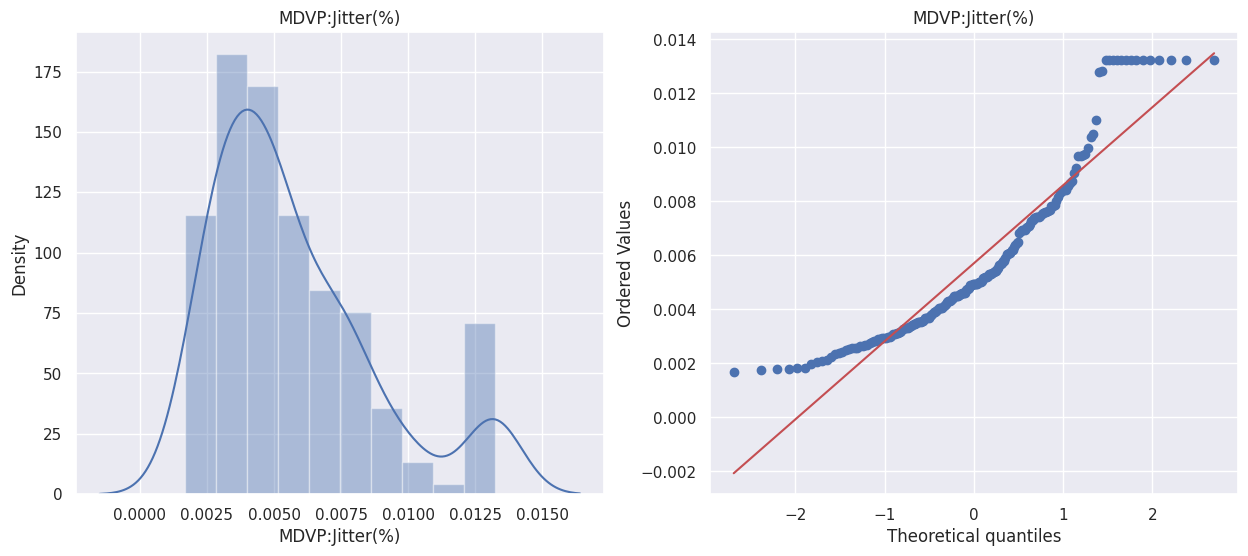

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


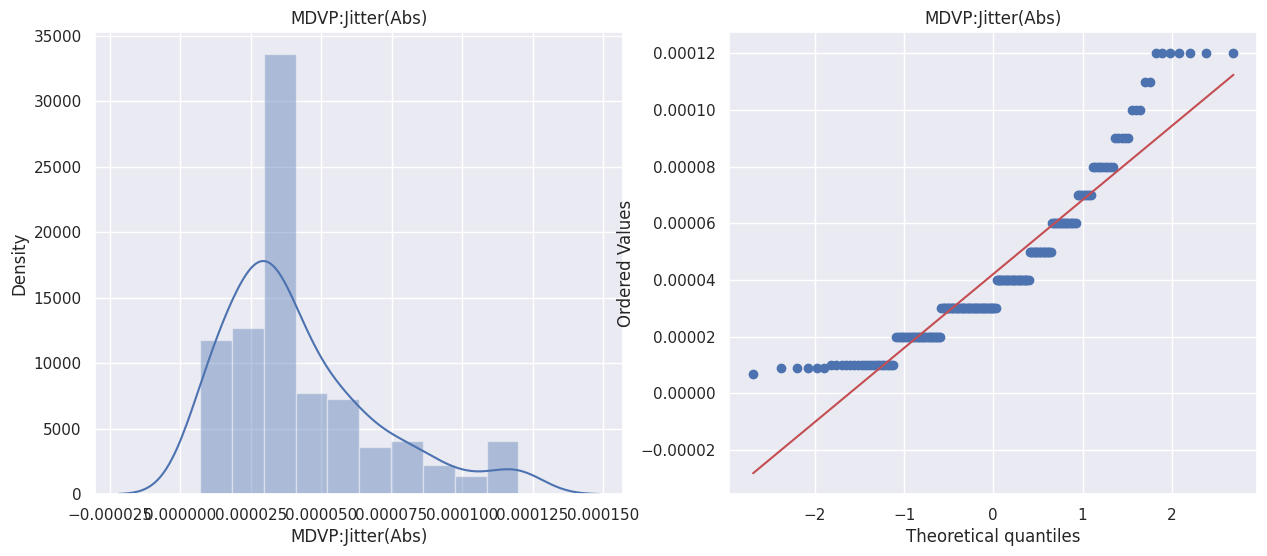

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


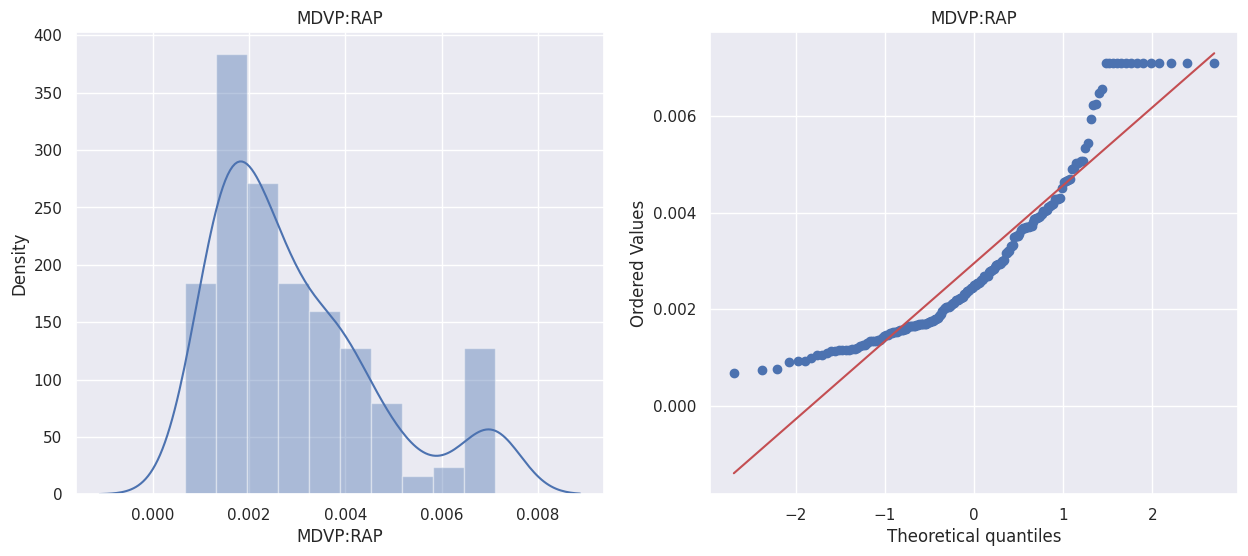

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


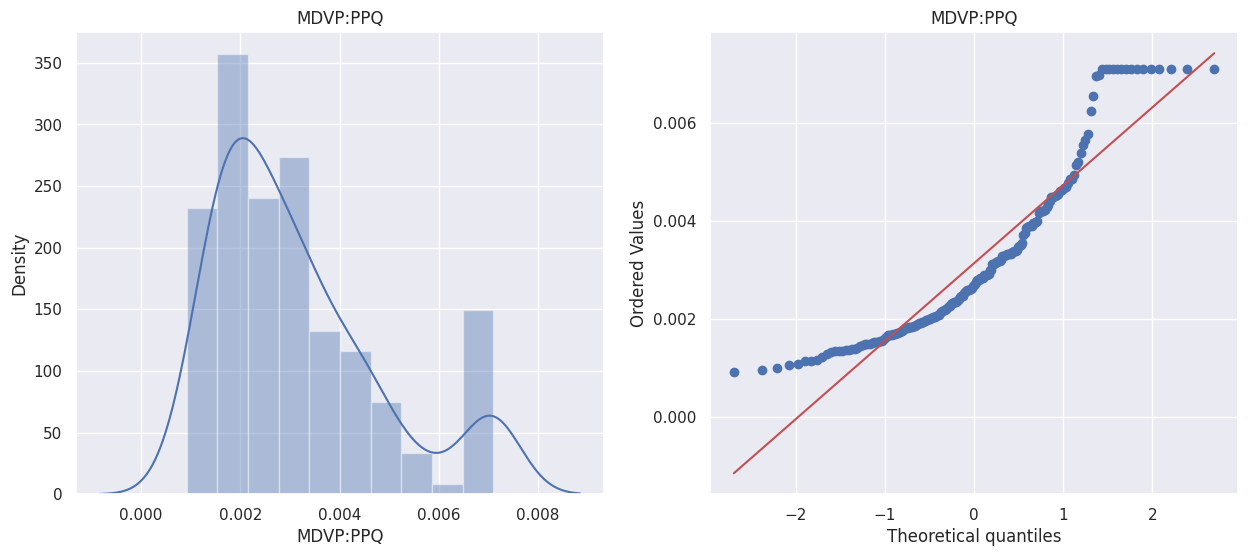

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


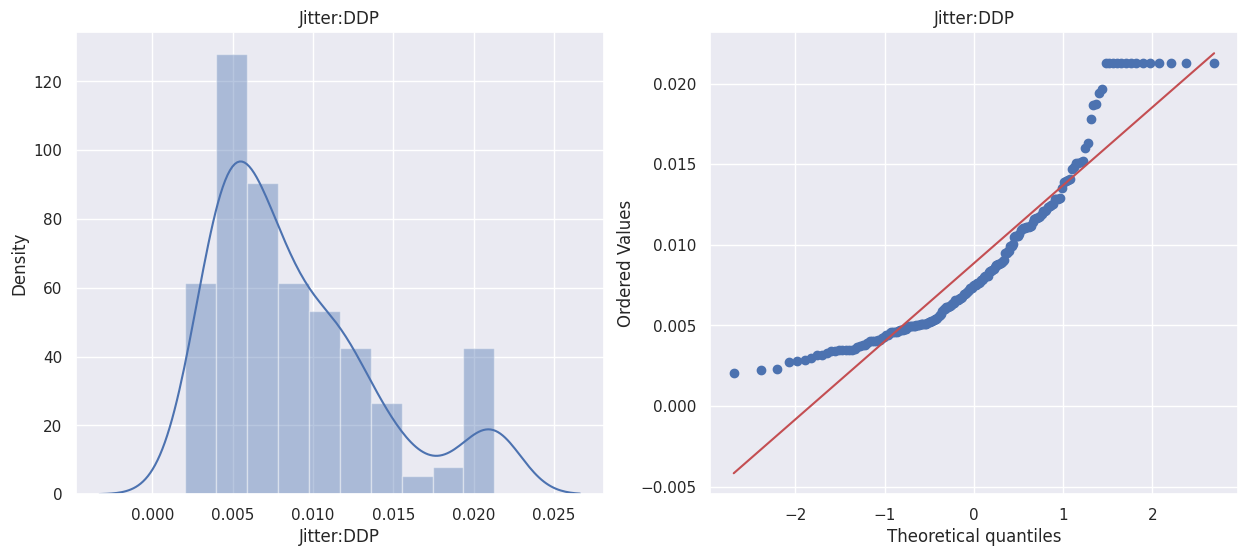

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


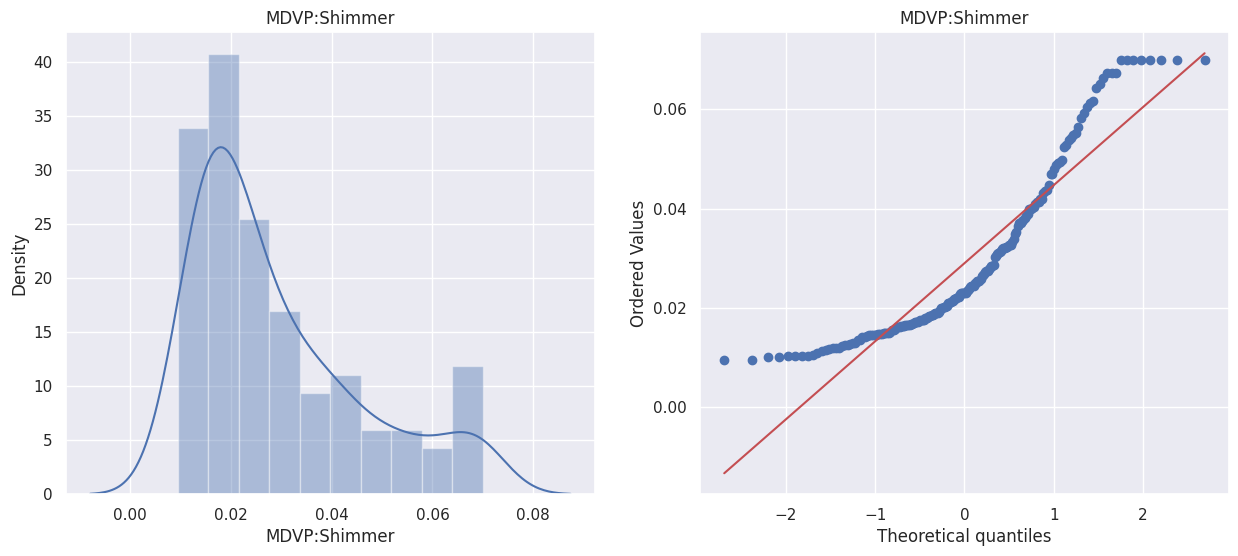

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


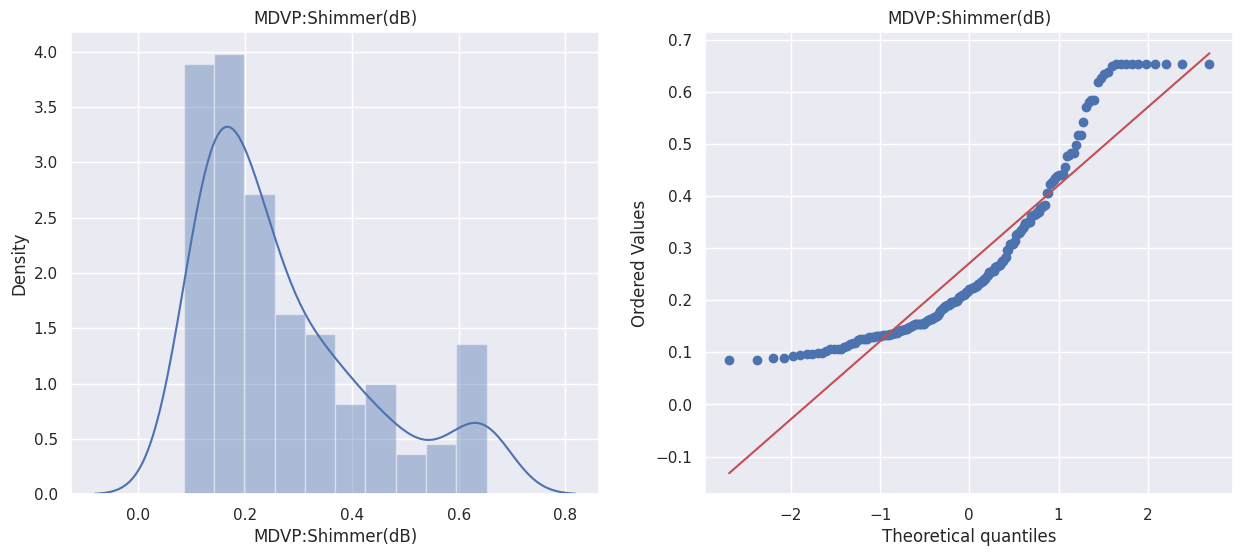

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


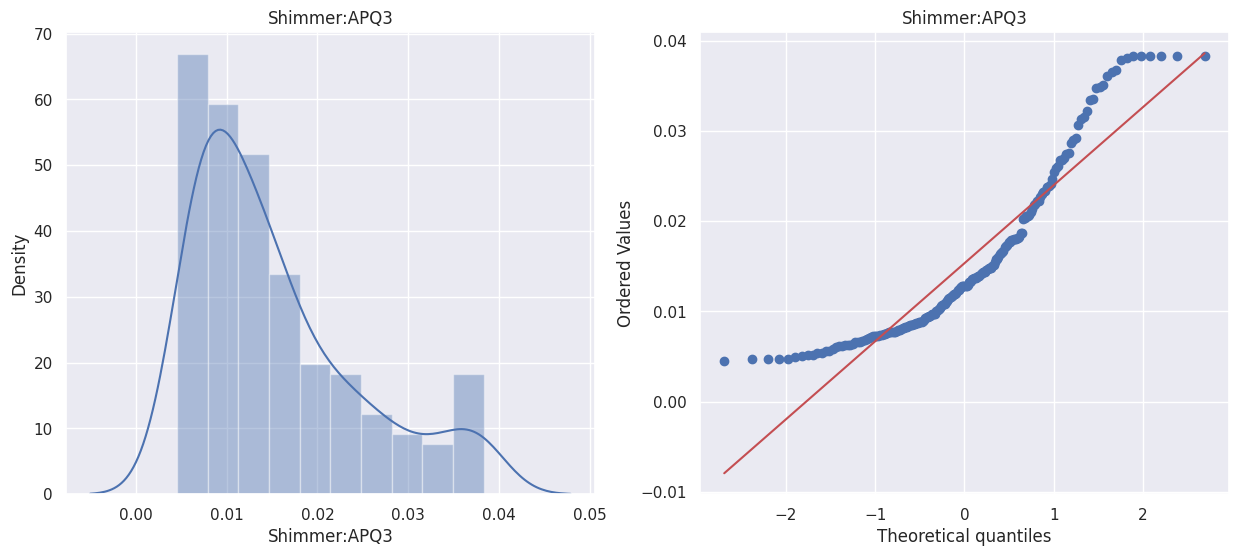

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


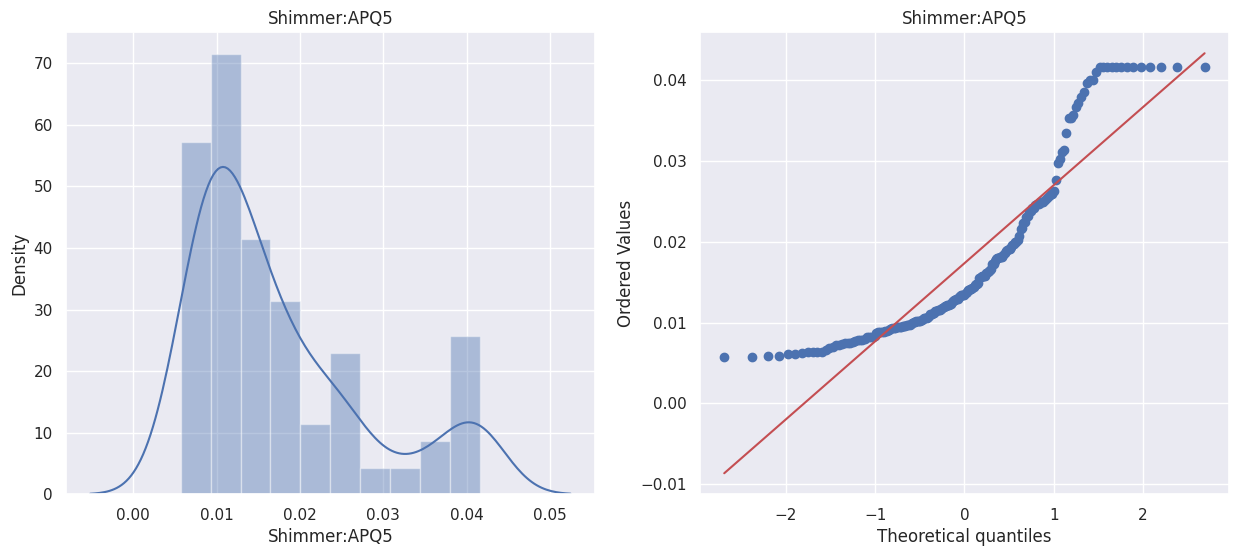

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


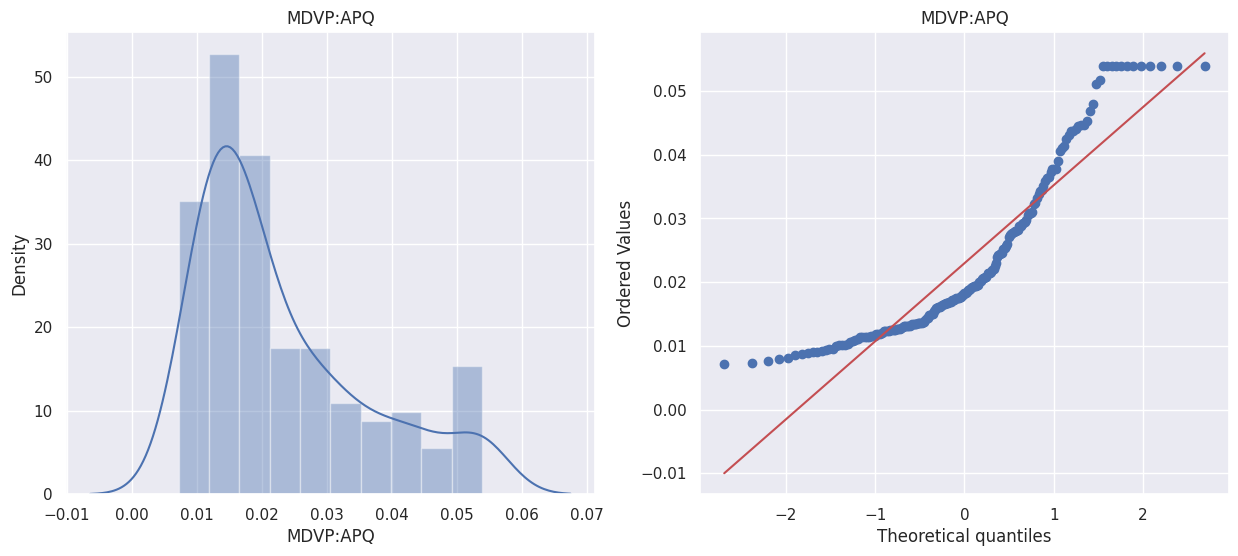

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


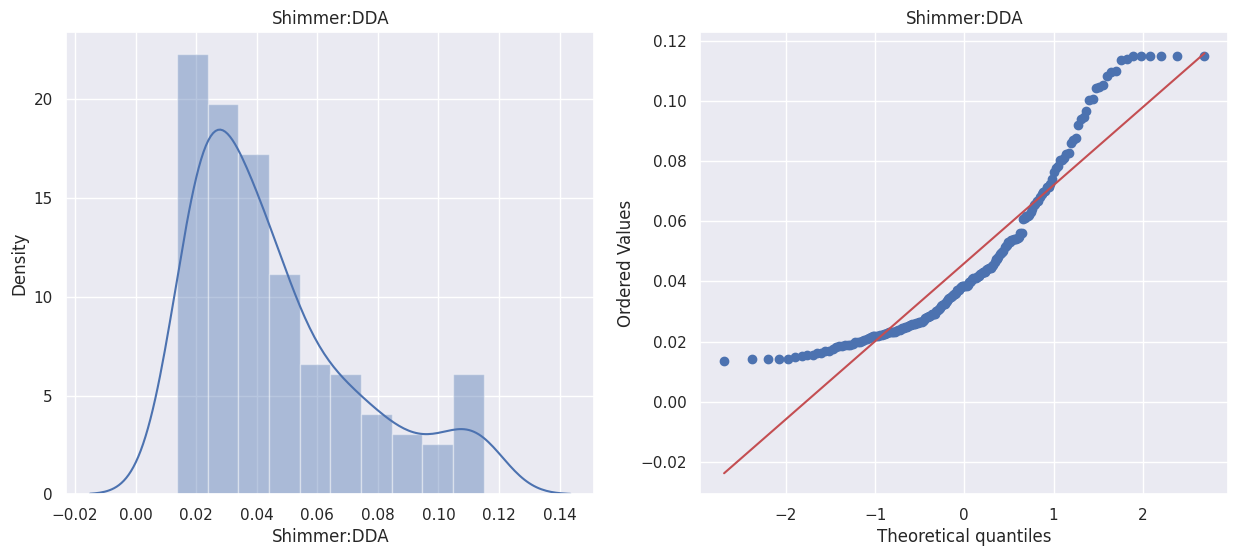

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


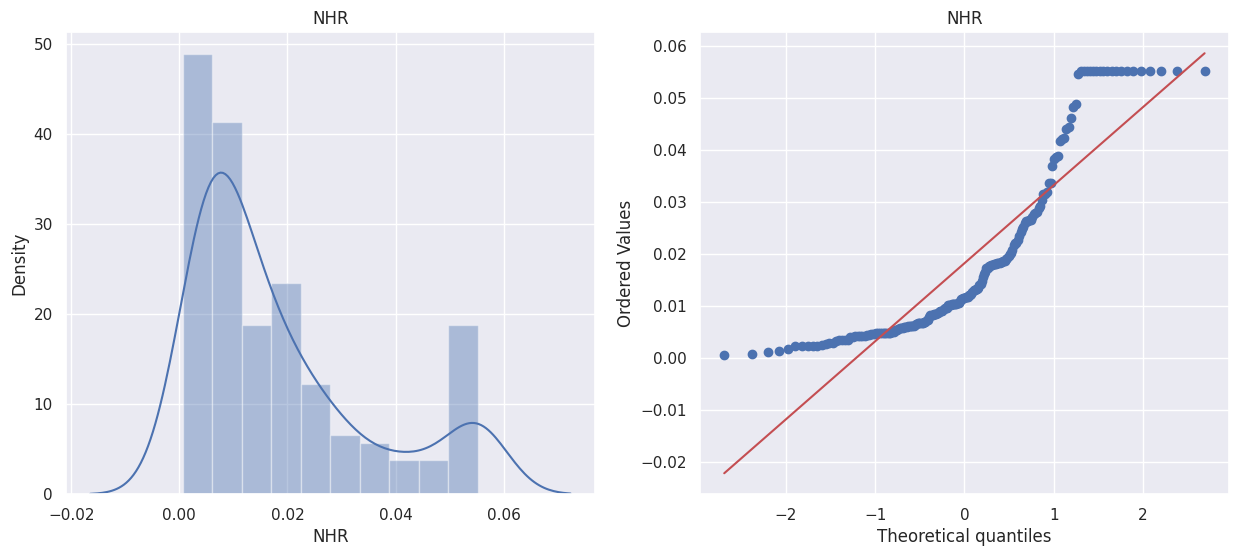

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


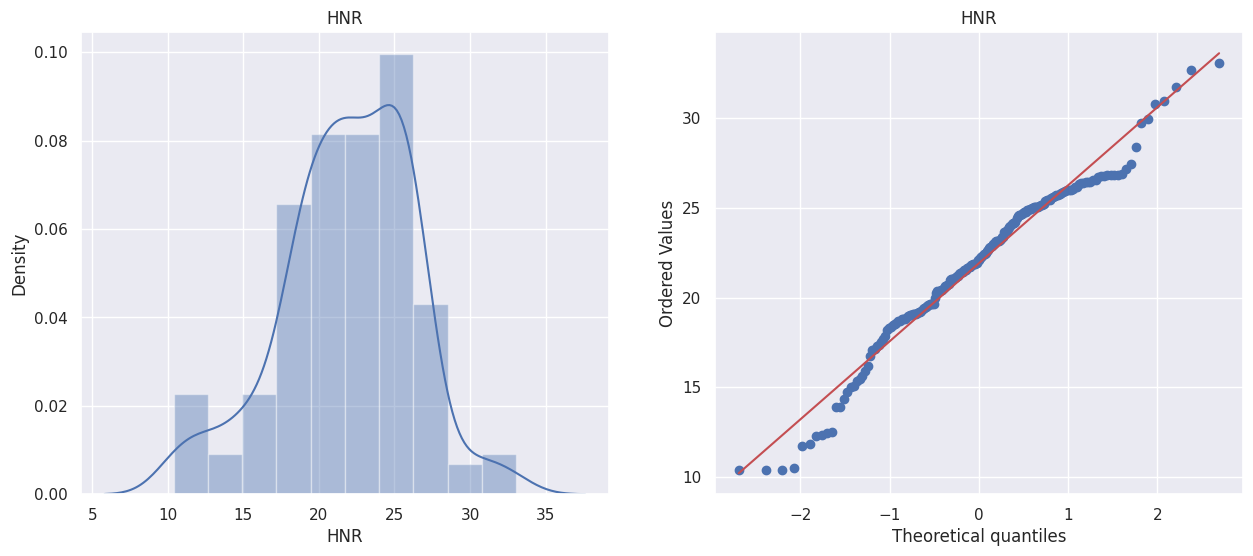

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


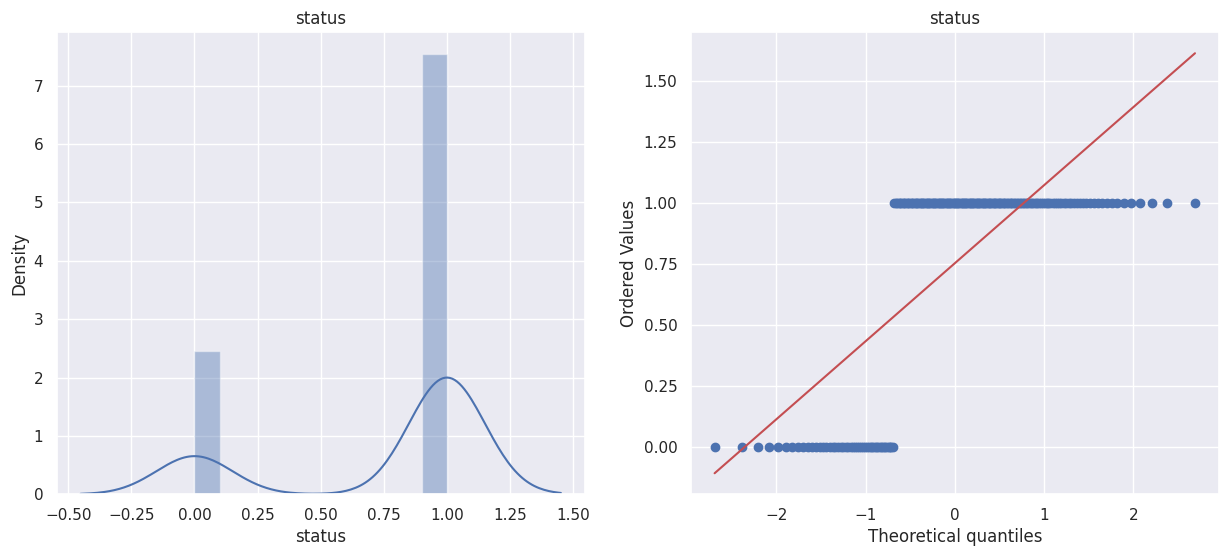

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


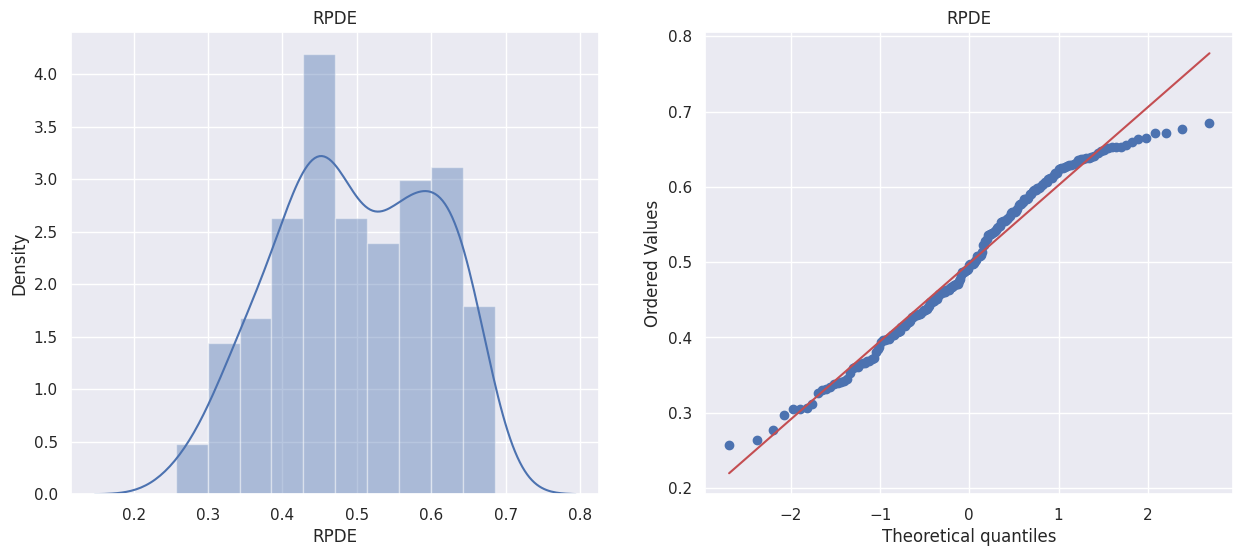

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


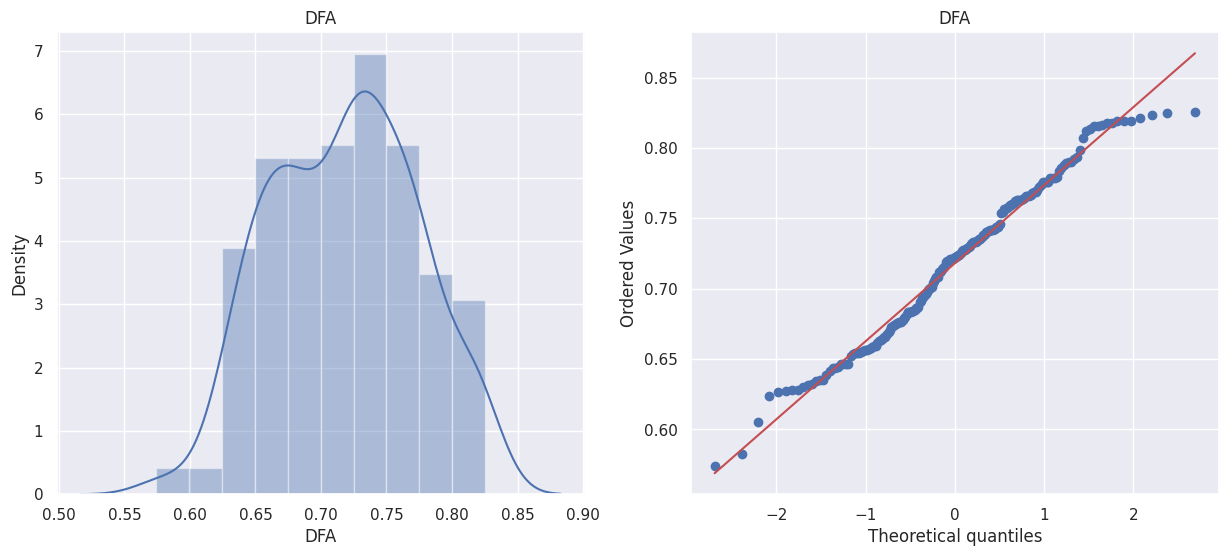

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


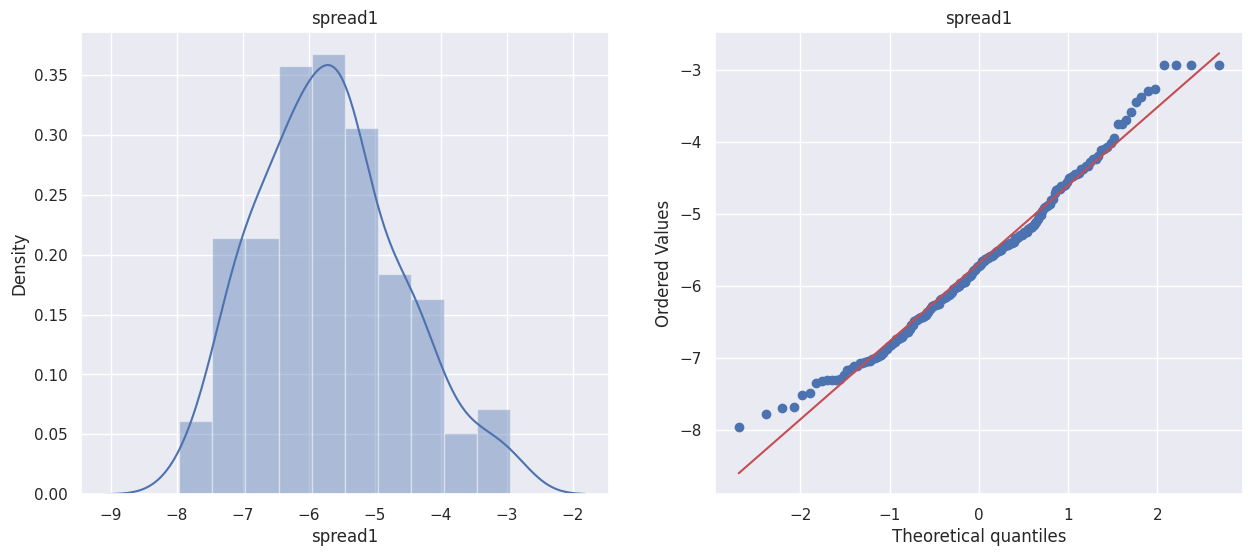

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


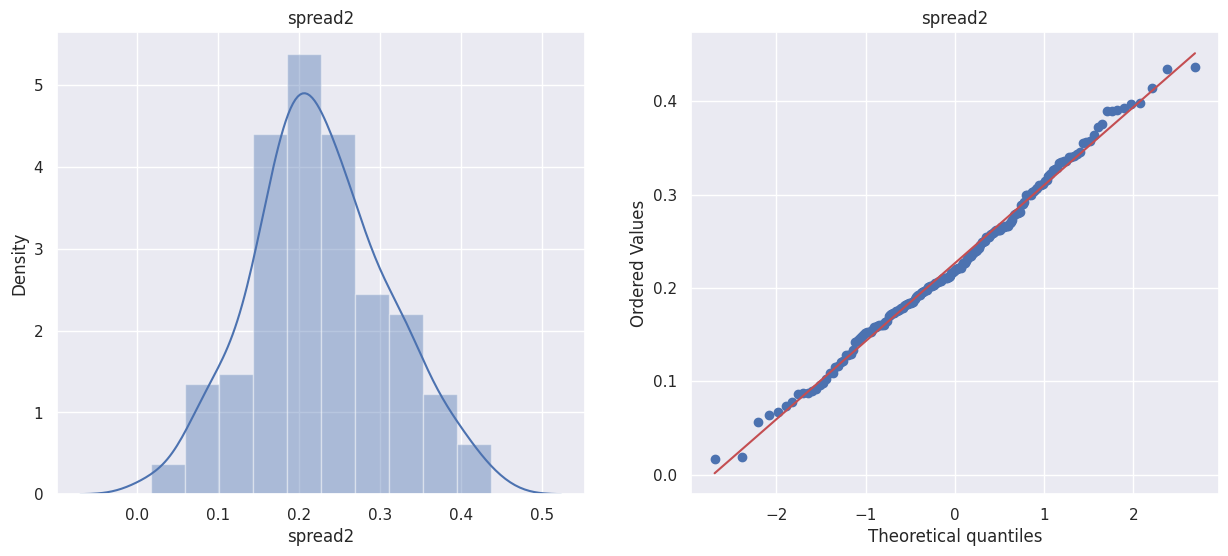

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


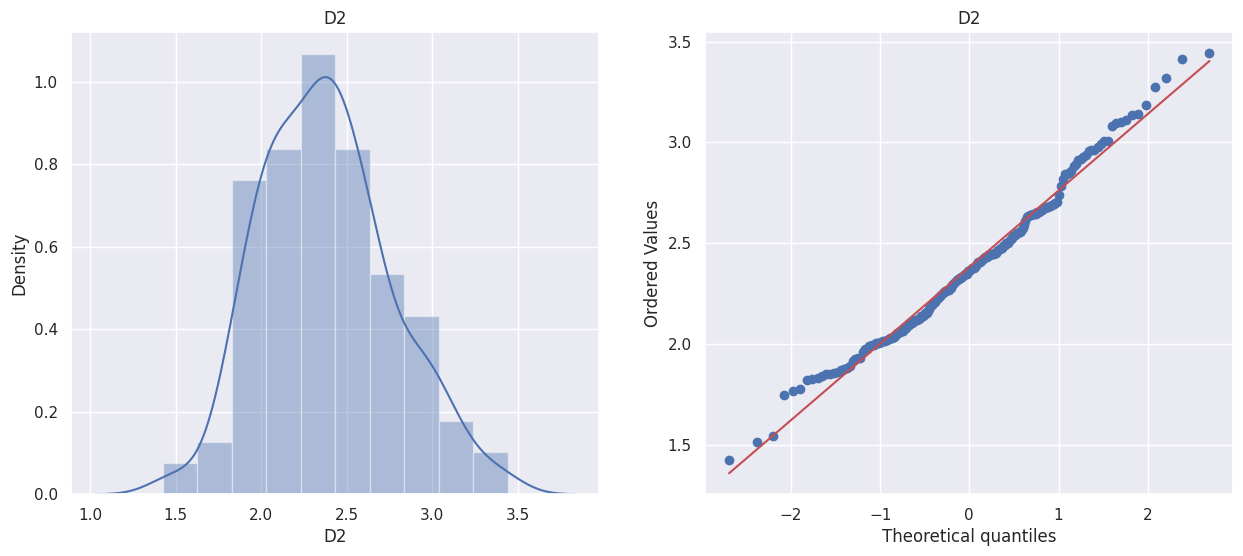

<ipython-input-111-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


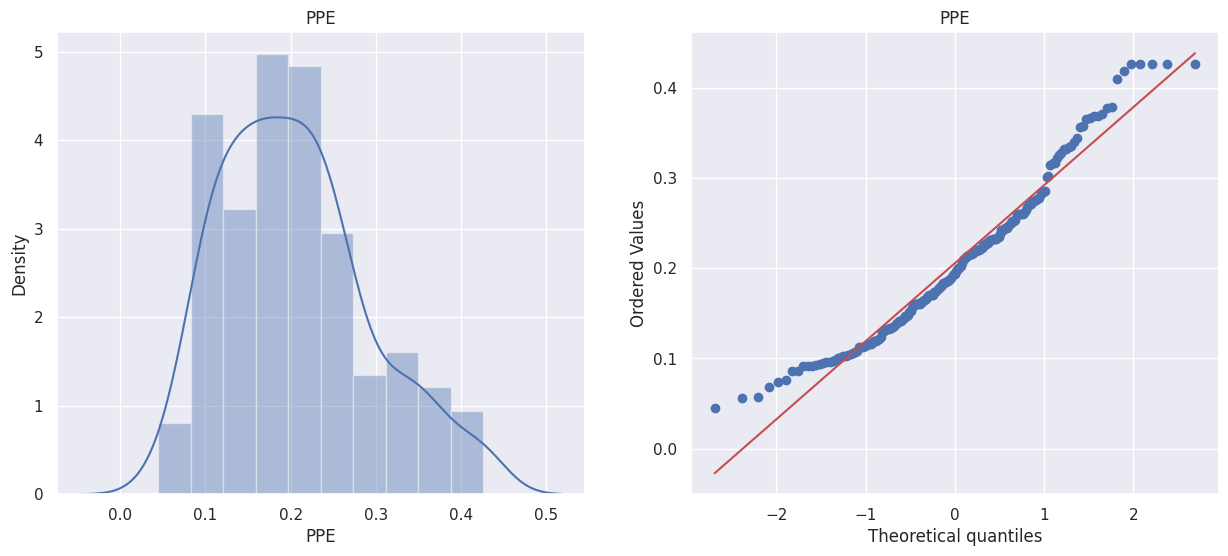

In [111]:
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
  plots(df, i)

# **Feature Engineering**

In [112]:
Y = df.pop("status")
X = df

In [113]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [115]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

#### **Mutual Information**

In [116]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

D2                  0.017913
RPDE                0.037003
Jitter:DDP          0.086798
DFA                 0.095116
MDVP:RAP            0.098723
MDVP:PPQ            0.100284
MDVP:Shimmer        0.100735
Shimmer:APQ3        0.108726
MDVP:Jitter(%)      0.109246
Shimmer:DDA         0.110436
MDVP:Shimmer(dB)    0.115552
NHR                 0.116257
Shimmer:APQ5        0.118179
HNR                 0.132462
MDVP:Fhi(Hz)        0.140029
MDVP:Jitter(Abs)    0.151498
MDVP:Flo(Hz)        0.174088
MDVP:APQ            0.184440
spread2             0.192002
MDVP:Fo(Hz)         0.206593
spread1             0.221368
PPE                 0.253982
dtype: float64

<Axes: >

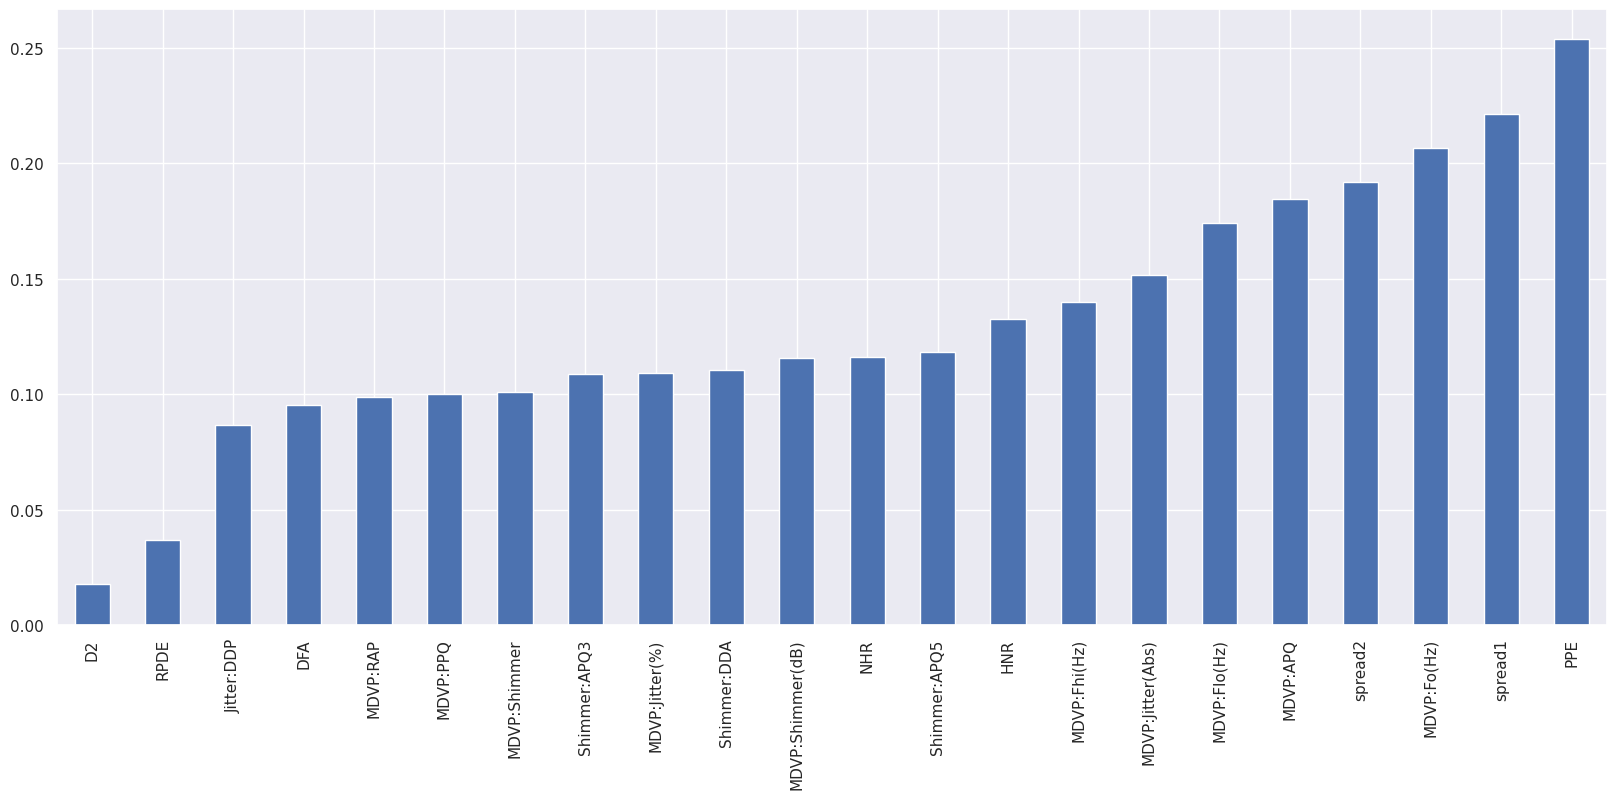

In [117]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20, 8))

#### **Spliting Data Into Train And Test**

In [119]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [120]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (156, 22)
train_label :  (156,)
test_data :  (39, 22)
test_label :  (39,)


#### **Normalizing Data**

In [121]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [122]:
train_data_sc

array([[ 0.42106183,  0.24372254, -0.94510259, ..., -0.0749456 ,
         0.49483246, -0.6558752 ],
       [-0.95694554, -0.94395522, -0.10492992, ...,  0.00636031,
         0.11335106, -0.22457189],
       [ 1.21847901,  0.60344395, -0.68235581, ..., -0.22966864,
         0.17981954, -0.17812719],
       ...,
       [ 0.41390707,  2.56856661, -0.85864664, ...,  1.6708331 ,
         1.51751222,  0.89775548],
       [ 2.46491405,  1.06837555,  1.68175306, ..., -0.37906466,
        -0.99101608, -1.35598851],
       [-1.09278562, -1.22518773, -0.3418452 , ..., -0.48079282,
        -1.36072382, -0.34889493]])

#### **PCA**

In [123]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [124]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [6.19905989e-01 1.40699034e-01 7.86426263e-02 5.23116994e-02
 3.16026626e-02 2.09475552e-02 1.45711579e-02 1.36782299e-02
 1.17896947e-02 4.45742453e-03 3.39765561e-03 3.04373853e-03
 1.85008667e-03 1.38161931e-03 6.36442513e-04 4.70556915e-04
 3.85182280e-04 1.34615187e-04 7.47766609e-05 1.92170924e-05
 3.46655366e-08 1.14639173e-09]


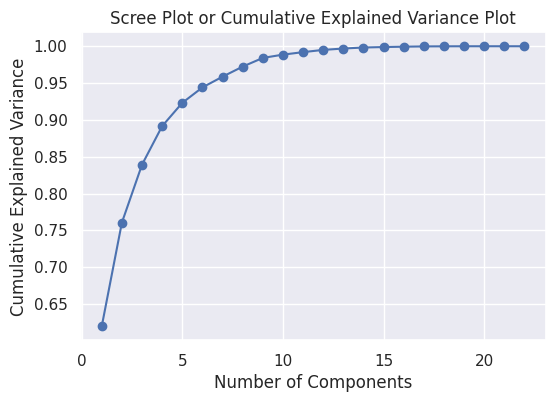

In [125]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [126]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 7


In [129]:
pc = PCA(n_components=7)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [130]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.61990599 0.14069903 0.07864263 0.0523117  0.03160266 0.02094756
 0.01457116]


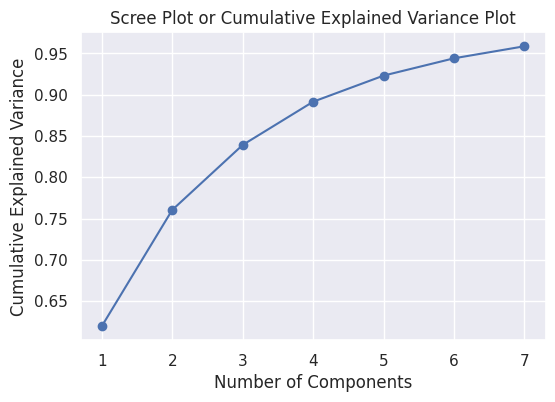

In [131]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [132]:
print("train_data : ",train_data_sc_pc.shape)
print("test_data : ",test_data_sc_pc.shape)

train_data :  (156, 7)
test_data :  (39, 7)


# **Model**

In [140]:
accuracy_results = {}

#### **Logistic Regression Model**

In [133]:
model_lr = LogisticRegression().fit(train_data_sc_pc,train_label)

In [134]:
y_pred = model_lr.predict(test_data_sc_pc)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [135]:
accuracy_score(y_pred,test_label)

0.7435897435897436

In [136]:
confusion_matrix(y_pred,test_label)

array([[ 5,  5],
       [ 5, 24]])

In [137]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.83      0.83      0.83        29

    accuracy                           0.74        39
   macro avg       0.66      0.66      0.66        39
weighted avg       0.74      0.74      0.74        39



In [138]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  0.8330645161290324
Test Data Cross_val_score :  0.8178571428571428


In [141]:
accuracy_results["Logistic_Regression_Accuracy"] = train_accuracy_lr

#### **Random Forest Model**

In [148]:
model_rf = RandomForestClassifier(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100).fit(train_data_sc_pc,train_label)

In [149]:
y_pred_2 = model_rf.predict(test_data_sc_pc)

In [150]:
confusion_matrix(y_pred_2,test_label)

array([[ 6,  0],
       [ 4, 29]])

In [151]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.88      0.94        33

    accuracy                           0.90        39
   macro avg       0.80      0.94      0.84        39
weighted avg       0.94      0.90      0.91        39



In [152]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.8463709677419355
Test Data Cross_val_score :  0.8428571428571429


In [153]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_rf)
print("Test Data Cross_val_score : ",test_accuracy_rf)

 Train Data Cross_val_score :  0.8528225806451614
Test Data Cross_val_score :  0.8464285714285713


In [154]:
accuracy_results["Random_Forest_Accuracy"] = train_accuracy_rf

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8784274193548388


#### **Decision Tree Model**

In [164]:
model_tree = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 5).fit(train_data_sc_pc,train_label)

In [165]:
y_pred_3 = model_tree.predict(test_data_sc_pc)

In [166]:
confusion_matrix(y_pred_2,test_label)

array([[ 6,  0],
       [ 4, 29]])

In [167]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.88      0.94        33

    accuracy                           0.90        39
   macro avg       0.80      0.94      0.84        39
weighted avg       0.94      0.90      0.91        39



In [168]:
train_accuracy_tree = cross_val_score(model_tree,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_tree)
print("Test Data Cross_val_score : ",test_accuracy_tree)

 Train Data Cross_val_score :  0.8209677419354838
Test Data Cross_val_score :  0.8964285714285714


In [169]:
accuracy_results["Decision_Tree_Accuracy"] = train_accuracy_tree

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8080645161290322


#### **KNN Model**

In [170]:
model_knn = KNeighborsClassifier().fit(train_data_sc_pc,train_label)

In [171]:
y_pred_4 = model_knn.predict(test_data_sc_pc)

In [172]:
confusion_matrix(y_pred_4,test_label)

array([[ 5,  0],
       [ 5, 29]])

In [173]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.85      0.92        34

    accuracy                           0.87        39
   macro avg       0.75      0.93      0.79        39
weighted avg       0.94      0.87      0.89        39



In [177]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_knn)
print("Test Data Cross_val_score : ",test_accuracy_knn)

 Train Data Cross_val_score :  0.9098790322580645
Test Data Cross_val_score :  0.8428571428571429


In [178]:
accuracy_results["KNN_Accuracy"] = train_accuracy_knn

# **Comparison of Classification Model Accuracies**

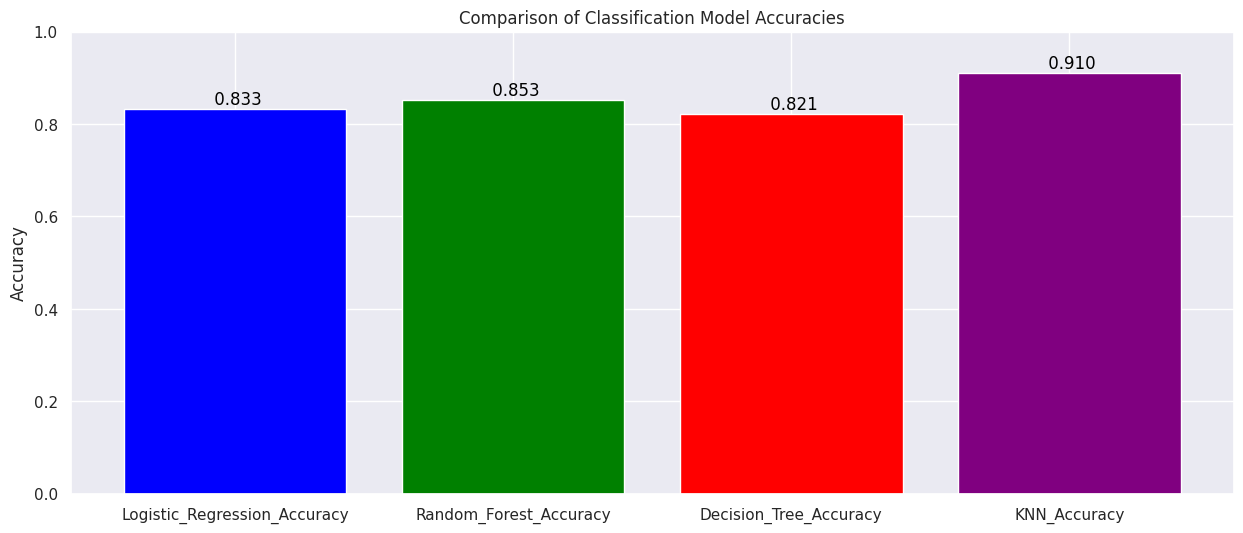

In [179]:
# Plotting the accuracy results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plotting the accuracy results using a different style
plt.figure(figsize=(15, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')

plt.show()